### Import Packages

In [7]:
import torch
is_cuda = torch.cuda.is_available()
if is_cuda:
    device = torch.device("cuda")
else:
    device = torch.device("cpu")
import torch.nn as nn
import numpy as np
import time
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pyDOE import lhs
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] =6,6
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from matplotlib.ticker import FormatStrFormatter
from scipy.interpolate import CubicSpline
from scipy.integrate import odeint
import tensorflow.compat.v1 as tff
tff.disable_v2_behavior()
np.random.seed(1234)
tff.random.set_random_seed(1234)
import sys
sys.path.insert(0, '../../Utilities/')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import matplotlib.dates as dates
import matplotlib as mpl
from rnn_models import *
from EINN_model import *
from cross_val import *
import matplotlib.dates as dates

Instructions for updating:
non-resource variables are not supported in the long term


Instructions for updating:
non-resource variables are not supported in the long term


In [8]:
torch.manual_seed(9)

### Output Folder

In [1]:
import os

c_dir =os.getcwd()
path = '/Results/' 
out = c_dir +path
if not os.path.exists(out):
    os.makedirs(out) 

c_dir =os.getcwd()
path = '/Models/' 
out1 = c_dir +path
if not os.path.exists(out1):
    os.makedirs(out1)

### Generated Data

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
## generated data
data =pd.read_csv('Malaria_Vaccination.csv')
tdat1=data.reindex(index=data.index[::-1])
tdat=tdat1.reindex(index=data.index[::-1])
I_new_sta= tdat['Infected']


I_new_sta = I_new_sta.rolling(window=7).mean()
I_new_sta = I_new_sta.to_numpy(dtype=np.float64)
I_new_sta = I_new_sta[6:]
I_new_sta = I_new_sta.reshape([len(I_new_sta), 1]) 

In [3]:
# I_new_sta

## RESNET

### Pre-trained with generated Data

In [4]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

def resnet(data, epochs, neurons, split, bs, num):
    # Assuming data has 1 feature
    input_shape = data.shape[1:]  # Shape of each sample in the data excluding the batch size

    inputs = keras.Input(shape=input_shape)

    x = layers.Dense(neurons, activation='tanh', bias_initializer='zeros', kernel_initializer=keras.initializers.HeNormal())(inputs)
    x1 = layers.Dense(neurons, activation='tanh', bias_initializer='zeros', kernel_initializer=keras.initializers.HeNormal())(x)
    x2 = layers.Dense(neurons, activation='tanh', bias_initializer='zeros', kernel_initializer=keras.initializers.HeNormal())(x1)
    x3 = layers.Dense(neurons, activation='tanh', bias_initializer='zeros', kernel_initializer=keras.initializers.HeNormal())(x2)
    x4 = layers.Add()([x3, x])
    outputs = layers.Dense(1)(x4)
    resModel = keras.Model(inputs, outputs)
    resModel.summary()
    
    ## Rescale the data
    z = data
    xdata = np.arange(len(z)).reshape((-1, 1))
    sf = 1e-4
    zz = z * sf
    
    # Compile and train the model
    resModel.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=keras.losses.MeanSquaredError())
    hist = resModel.fit(xdata, zz, batch_size=bs, epochs=epochs, verbose=0, validation_split=split, shuffle=True)
    
    # Save the pre-trained model
    # Assuming `out1` is defined elsewhere
    #resModel.save(out1 + "resnet.model")
    resModel.save("resnet.h5")


# Assuming I_new_sta is your input data
I_new_star_train = I_new_sta[290:,:]
num = len(I_new_star_train)
resnet(I_new_star_train, 4000, 50, 0.0, 10, num)


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 50)                │             100 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 50)                │           2,550 │ dense[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 50)                │           2,550 │ dense_1[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_3 (Dense)               │ (None, 50)                │           2,550 │ dense_2[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ add (Add)                     │ (None, 50)                │               0 │ dense_3[0][0], dense[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_4 (Dense)               │ (None, 1)                 │              51 │ add[0][0]                  │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 7,801 (30.47 KB)

 Trainable params: 7,801 (30.47 KB)

 Non-trainable params: 0 (0.00 B)

## Load Pre-Trained Model: ResNet

In [5]:
import time
import matplotlib.dates as dates
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] =6,6


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


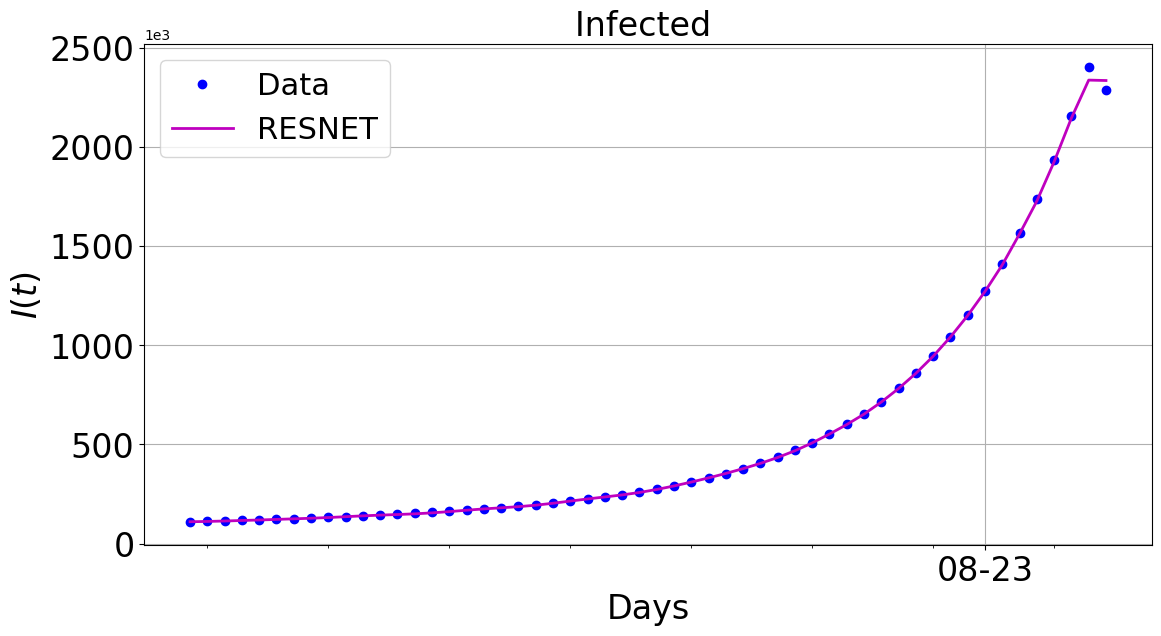

In [6]:
#resnet_model =tf.keras.models.load_model("Models/resnet.model")
resnet_model =tf.keras.models.load_model("resnet.h5")
z =I_new_sta[290:,:]  ##You can choose
# z =I_new_sta  ##You can choose
num =len(z)
xdata =np.arange(len(z)).reshape((-1,1))
y0=resnet_model.predict(xdata)
sf =1e-4
ydata =y0/sf
np.save(out+'resnetdata.npy', ydata)
stime ='2023-06-16'
st=dates.datestr2num(stime)
dtrange=np.arange(num)
dtrange =dtrange +st
font = 24
fig, ax = plt.subplots() 
ax.plot(dtrange, z,'ob', lw=2,label=r'Data')
ax.plot(dtrange, ydata, 'm', lw=2,label=r'RESNET')
ax.xaxis.set_major_locator(dates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(dates.DateFormatter('%m-%y'))
ax.xaxis.set_minor_locator(dates.DayLocator(interval=7))
ax.legend(fontsize=22)
ax.tick_params(axis='both', labelsize = 24)
ax.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
ax.grid(True)
ax.set_xlabel('Days', fontsize = font)
ax.set_ylabel('$I(t)$', fontsize = font) 
ax.set_title(r'Infected ',  fontsize = font)
fig.set_size_inches(w=13,h=6.5)
plt.show()

## Error Metrics for Data Driven Simulation

## RNN Models

In [9]:
##define the data
realDat =z
resnetDat=np.load("Results/resnetdata.npy")


### GRU

In [10]:
batch_size=32
actual_g, pred_g, train_act_g, train_prd_g, test_act_g, test_prd_g, ep_g, loss_g =run_model(realDat , "Real", 0.0, "GRU", "TN", 1500, batch_size)

TN outcomes............
GRU Training
Epoch 100/1500, Total Loss: 2.816e-04, Time:0.00 seconds
Epoch 200/1500, Total Loss: 9.819e-05, Time:0.02 seconds
Epoch 300/1500, Total Loss: 1.503e-04, Time:0.00 seconds
Epoch 400/1500, Total Loss: 5.638e-05, Time:0.00 seconds
Epoch 500/1500, Total Loss: 1.074e-04, Time:0.00 seconds
Epoch 600/1500, Total Loss: 7.336e-05, Time:0.00 seconds
Epoch 700/1500, Total Loss: 5.645e-05, Time:0.00 seconds
Epoch 800/1500, Total Loss: 8.399e-05, Time:0.00 seconds
Epoch 900/1500, Total Loss: 6.841e-05, Time:0.00 seconds
Epoch 1000/1500, Total Loss: 4.595e-05, Time:0.00 seconds
Epoch 1100/1500, Total Loss: 4.566e-05, Time:0.00 seconds
Epoch 1200/1500, Total Loss: 6.538e-05, Time:0.00 seconds
Epoch 1300/1500, Total Loss: 1.013e-04, Time:0.00 seconds
Epoch 1400/1500, Total Loss: 5.823e-05, Time:0.00 seconds
Epoch 1500/1500, Total Loss: 9.055e-05, Time:0.00 seconds
GRU Total Training Time in seconds 5.8500049114227295
Evaluation Time: 0.0
residual sum of squares 370

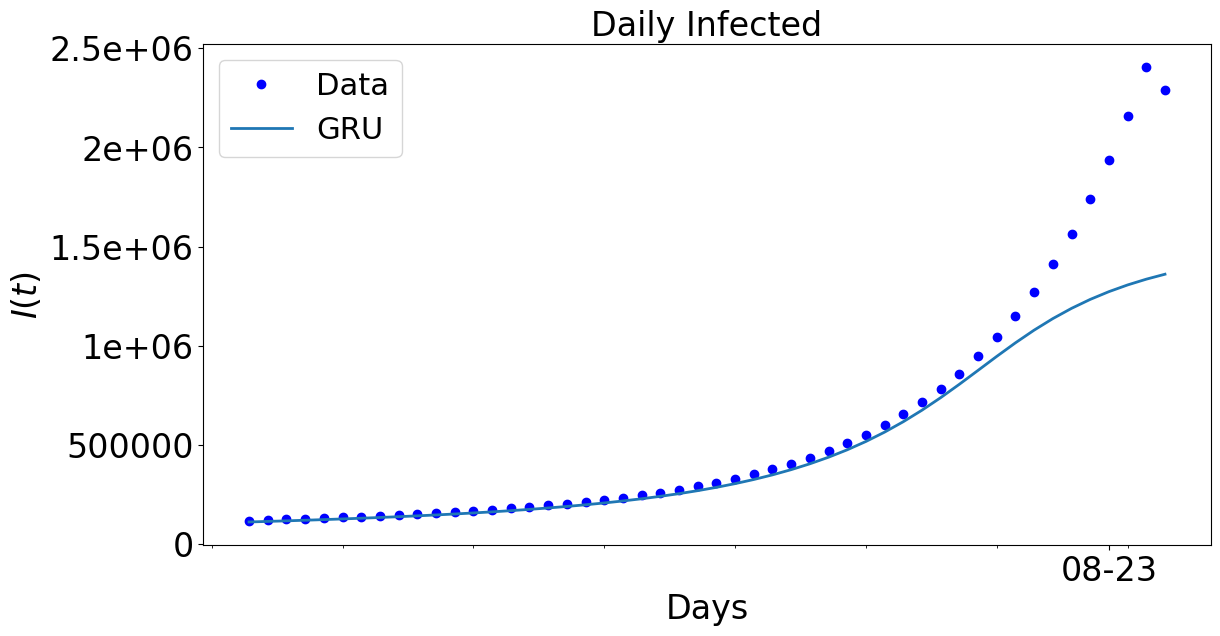

In [11]:
stime ='2023-06-16'
st=dates.datestr2num(stime)
z =I_new_sta[290:,:]  ##You can choose
dtrange=np.arange(len(z))
dtrange =dtrange +st 
font = 24
fig, ax = plt.subplots() 
ax.plot(dtrange[:-4], z[4:],'ob', lw=2,label=r'Data')
ax.plot(dtrange[:-4], pred_g,  lw=2,label ='GRU')
# ax.plot(dtrange,pred_bs6,  lw=2,label=' ResNet-BiLSTM')
# ax.plot(dtrange,pred_gs6,  lw=2,label =' ResNet-GRU')
ax.xaxis.set_major_locator(dates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(dates.DateFormatter('%m-%y'))
ax.xaxis.set_minor_locator(dates.DayLocator(interval=7))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.legend(fontsize=22)
ax.tick_params(axis='both', labelsize = 24)
ax.set_xlabel('Days', fontsize = font)
ax.set_ylabel('$I(t)$', fontsize = font) 
ax.set_title('Daily Infected',  fontsize = font)
fig.set_size_inches(w=13,h=6.5)
plt.show()

### LSTM

In [12]:
batch_size=32
actual_l, pred_l, train_act_l, train_prd_l, test_act_l, test_prd_l, ep_l, loss_l = run_model(realDat , "Real", 0.0, "LSTM", "TN",  1500, batch_size)

TN outcomes............
LSTM Training
Epoch 100/1500, Total Loss: 1.638e-04, Time:0.00 seconds
Epoch 200/1500, Total Loss: 1.704e-04, Time:0.00 seconds
Epoch 300/1500, Total Loss: 5.203e-05, Time:0.00 seconds
Epoch 400/1500, Total Loss: 8.178e-05, Time:0.00 seconds
Epoch 500/1500, Total Loss: 4.377e-05, Time:0.00 seconds
Epoch 600/1500, Total Loss: 6.968e-05, Time:0.00 seconds
Epoch 700/1500, Total Loss: 9.728e-05, Time:0.00 seconds
Epoch 800/1500, Total Loss: 4.269e-05, Time:0.00 seconds
Epoch 900/1500, Total Loss: 4.641e-05, Time:0.00 seconds
Epoch 1000/1500, Total Loss: 6.844e-05, Time:0.00 seconds
Epoch 1100/1500, Total Loss: 5.779e-05, Time:0.00 seconds
Epoch 1200/1500, Total Loss: 4.562e-05, Time:0.02 seconds
Epoch 1300/1500, Total Loss: 3.047e-05, Time:0.00 seconds
Epoch 1400/1500, Total Loss: 9.333e-05, Time:0.02 seconds
Epoch 1500/1500, Total Loss: 1.261e-04, Time:0.00 seconds
LSTM Total Training Time in seconds 5.545669317245483
Evaluation Time: 0.0
residual sum of squares 41

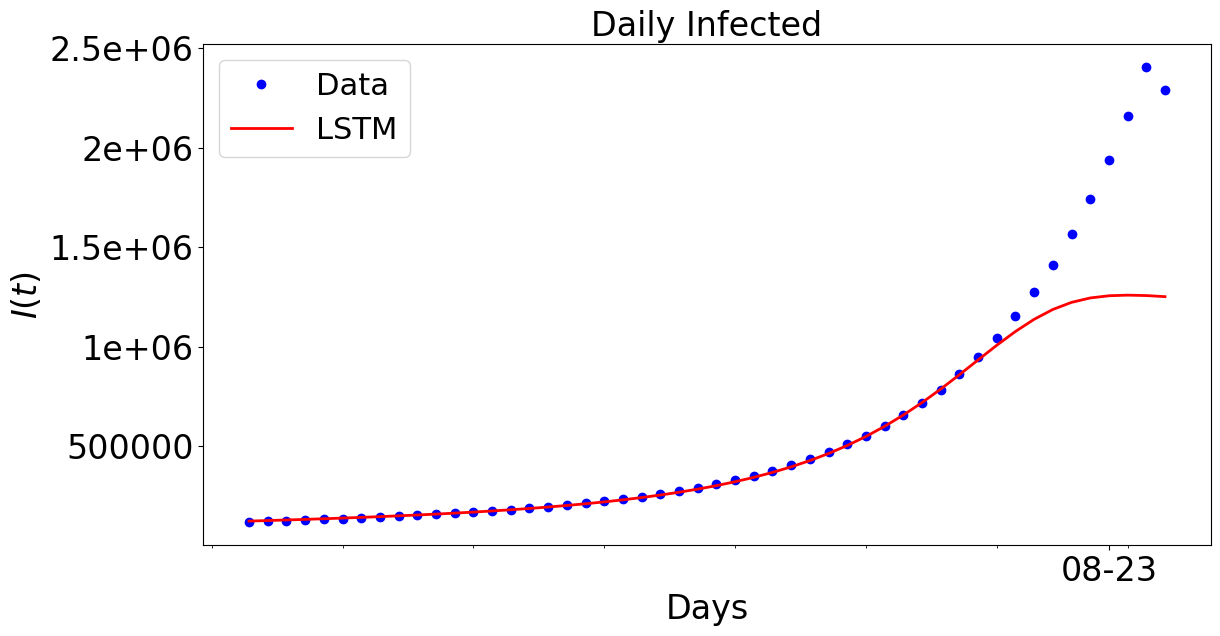

In [13]:
stime ='2023-06-16'
st=dates.datestr2num(stime)
z =I_new_sta[290:,:]  ##You can choose
dtrange=np.arange(len(z))
dtrange =dtrange +st 
font = 24
fig, ax = plt.subplots() 
ax.plot(dtrange[:-4], z[4:],'ob', lw=2,label=r'Data')
ax.plot(dtrange[:-4], pred_l, 'r',  lw=2,label ='LSTM')
ax.xaxis.set_major_locator(dates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(dates.DateFormatter('%m-%y'))
ax.xaxis.set_minor_locator(dates.DayLocator(interval=7))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.legend(fontsize=22)
ax.tick_params(axis='both', labelsize = 24)
ax.set_xlabel('Days', fontsize = font)
ax.set_ylabel('$I(t)$', fontsize = font) 
ax.set_title('Daily Infected',  fontsize = font)
fig.set_size_inches(w=13,h=6.5)
plt.show()

### BiLSTM

In [14]:
batch_size=32
actual_b, pred_b, train_act_b, train_prd_b, test_act_b, test_prd_b, ep_b, loss_b =run_model(realDat , "Real", 0.0, "BiLSTM", "TN", 1500, batch_size)

TN outcomes............
BiLSTM Training
Epoch 100/1500, Total Loss: 5.332e-05, Time:0.02 seconds
Epoch 200/1500, Total Loss: 5.524e-05, Time:0.00 seconds
Epoch 300/1500, Total Loss: 4.640e-05, Time:0.00 seconds
Epoch 400/1500, Total Loss: 2.746e-05, Time:0.00 seconds
Epoch 500/1500, Total Loss: 5.622e-05, Time:0.02 seconds
Epoch 600/1500, Total Loss: 2.930e-05, Time:0.00 seconds
Epoch 700/1500, Total Loss: 2.344e-05, Time:0.02 seconds
Epoch 800/1500, Total Loss: 5.337e-05, Time:0.00 seconds
Epoch 900/1500, Total Loss: 3.113e-05, Time:0.02 seconds
Epoch 1000/1500, Total Loss: 2.176e-05, Time:0.01 seconds
Epoch 1100/1500, Total Loss: 3.722e-05, Time:0.02 seconds
Epoch 1200/1500, Total Loss: 1.899e-05, Time:0.00 seconds
Epoch 1300/1500, Total Loss: 1.115e-05, Time:0.00 seconds
Epoch 1400/1500, Total Loss: 4.337e-05, Time:0.02 seconds
Epoch 1500/1500, Total Loss: 2.843e-05, Time:0.00 seconds
BiLSTM Total Training Time in seconds 6.8664710521698
Evaluation Time: 0.0
residual sum of squares 

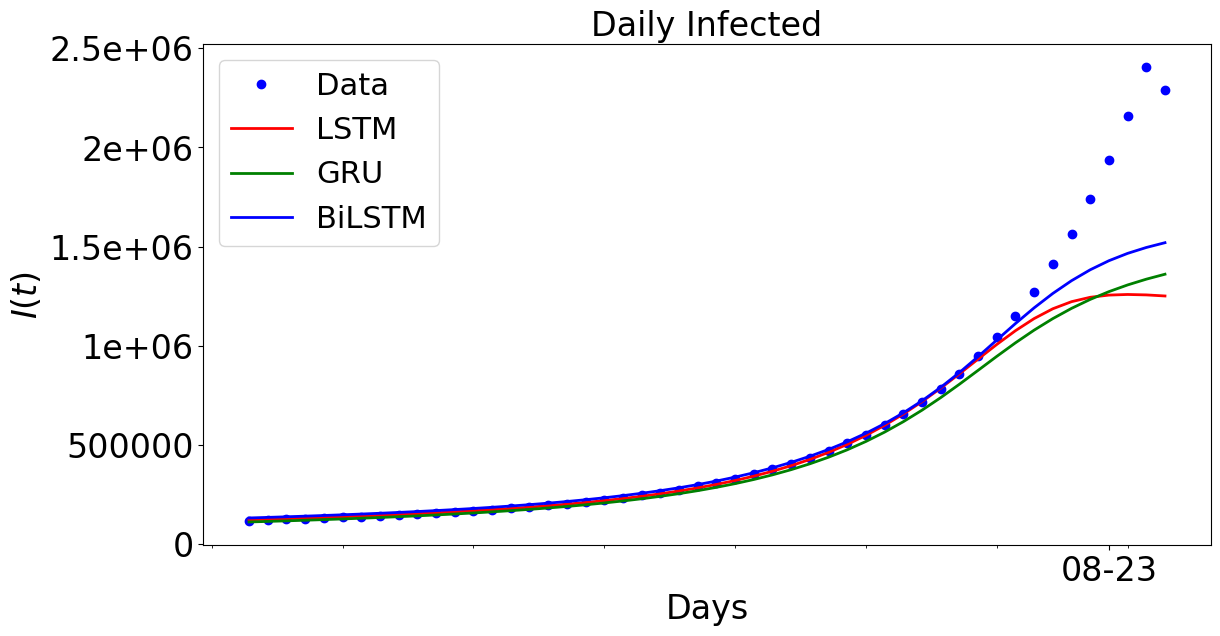

In [15]:
stime ='2023-06-16'
st=dates.datestr2num(stime)
z =I_new_sta[290:,:]  ##You can choose
dtrange=np.arange(len(z))
dtrange =dtrange +st 
font = 24
fig, ax = plt.subplots() 
ax.plot(dtrange[:-4], z[4:],'ob', lw=2,label=r'Data')
# ax.plot(dtrange, ydata, 'm', lw=2,label=r'RESNET')
ax.plot(dtrange[:-4], pred_l, 'r',  lw=2,label ='LSTM')
ax.plot(dtrange[:-4], pred_g, 'g', lw=2,label ='GRU')
ax.plot(dtrange[:-4], pred_b, 'b', lw=2,label ='BiLSTM')
ax.xaxis.set_major_locator(dates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(dates.DateFormatter('%m-%y'))
ax.xaxis.set_minor_locator(dates.DayLocator(interval=7))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.legend(fontsize=22)
ax.tick_params(axis='both', labelsize = 24)
ax.set_xlabel('Days', fontsize = font)
ax.set_ylabel('$I(t)$', fontsize = font) 
ax.set_title('Daily Infected',  fontsize = font)
fig.set_size_inches(w=13,h=6.5)
plt.show()

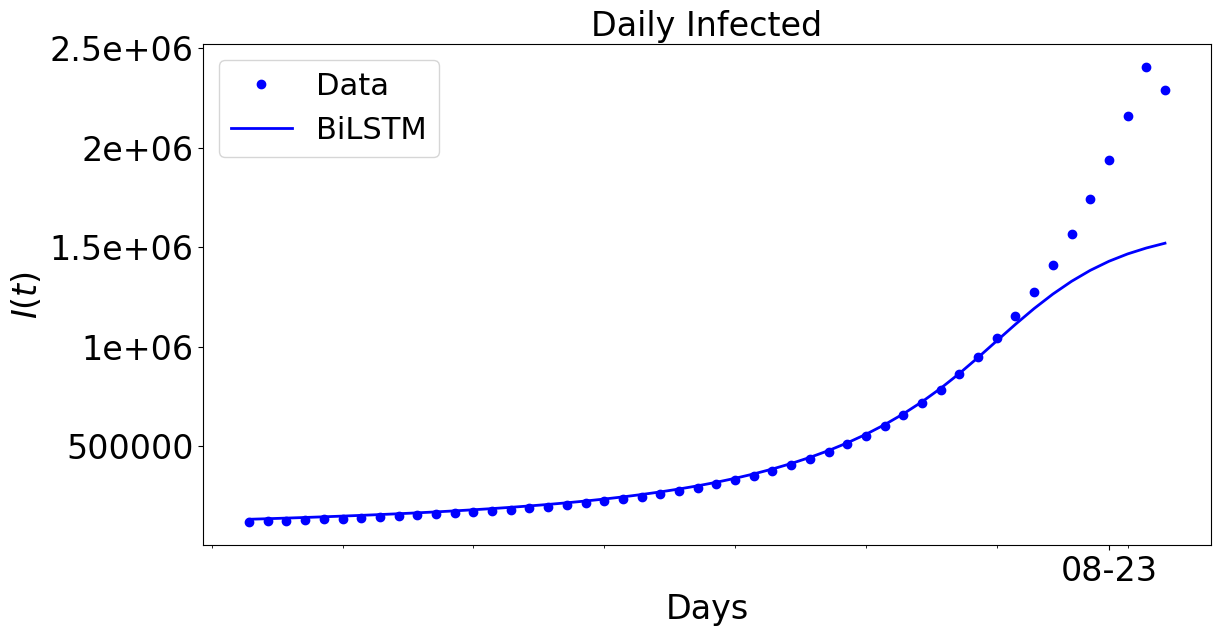

In [16]:
stime ='2023-06-16'
st=dates.datestr2num(stime)
z =I_new_sta[290:,:]  ##You can choose
dtrange=np.arange(len(z))
dtrange =dtrange +st 
font = 24
fig, ax = plt.subplots() 
ax.plot(dtrange[:-4], z[4:],'ob', lw=2,label=r'Data')
# ax.plot(dtrange, ydata, 'm', lw=2,label=r'RESNET')
ax.plot(dtrange[:-4], pred_b, 'b', lw=2,label ='BiLSTM')
ax.xaxis.set_major_locator(dates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(dates.DateFormatter('%m-%y'))
ax.xaxis.set_minor_locator(dates.DayLocator(interval=7))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.legend(fontsize=22)
ax.tick_params(axis='both', labelsize = 24)
ax.set_xlabel('Days', fontsize = font)
ax.set_ylabel('$I(t)$', fontsize = font) 
ax.set_title('Daily Infected',  fontsize = font)
fig.set_size_inches(w=13,h=6.5)
plt.show()

# Hybrid Approaches

### ResNet-GRU

In [17]:
batch_size=32
actual_gs6, pred_gs6, train_act_gs6, train_prd_gs6, test_act_gs6, test_prd_gs6, ep_gs6, loss_gs6 =run_model(resnetDat, "RESNET", 0.0, "GRU", "TN", 1500, batch_size)

TN outcomes............
GRU Training
Epoch 100/1500, Total Loss: 1.136e-04, Time:0.01 seconds
Epoch 200/1500, Total Loss: 6.400e-05, Time:0.00 seconds
Epoch 300/1500, Total Loss: 2.055e-04, Time:0.00 seconds
Epoch 400/1500, Total Loss: 1.552e-04, Time:0.00 seconds
Epoch 500/1500, Total Loss: 6.834e-05, Time:0.00 seconds
Epoch 600/1500, Total Loss: 3.668e-05, Time:0.00 seconds
Epoch 700/1500, Total Loss: 8.874e-05, Time:0.00 seconds
Epoch 800/1500, Total Loss: 5.801e-05, Time:0.00 seconds
Epoch 900/1500, Total Loss: 7.078e-05, Time:0.01 seconds
Epoch 1000/1500, Total Loss: 6.616e-05, Time:0.00 seconds
Epoch 1100/1500, Total Loss: 5.646e-05, Time:0.00 seconds
Epoch 1200/1500, Total Loss: 5.986e-05, Time:0.00 seconds
Epoch 1300/1500, Total Loss: 9.736e-05, Time:0.00 seconds
Epoch 1400/1500, Total Loss: 6.705e-05, Time:0.00 seconds
Epoch 1500/1500, Total Loss: 3.577e-05, Time:0.00 seconds
GRU Total Training Time in seconds 5.277332544326782
Evaluation Time: 0.0
residual sum of squares 3975

### ResNet-BiLSTM

In [18]:
batch_size=32
actual_bs6, pred_bs6, train_act_bs6, train_prd_bs6, test_act_bs6, test_prd_bs6, ep_bs6, loss_bs6=run_model(resnetDat, "RESNET", 0.0, "BiLSTM", "TN", 1500, batch_size)

TN outcomes............
BiLSTM Training
Epoch 100/1500, Total Loss: 6.151e-05, Time:0.01 seconds
Epoch 200/1500, Total Loss: 8.964e-05, Time:0.00 seconds
Epoch 300/1500, Total Loss: 5.467e-05, Time:0.02 seconds
Epoch 400/1500, Total Loss: 2.112e-05, Time:0.00 seconds
Epoch 500/1500, Total Loss: 1.874e-05, Time:0.00 seconds
Epoch 600/1500, Total Loss: 4.769e-05, Time:0.01 seconds
Epoch 700/1500, Total Loss: 4.024e-05, Time:0.00 seconds
Epoch 800/1500, Total Loss: 6.093e-05, Time:0.00 seconds
Epoch 900/1500, Total Loss: 3.139e-05, Time:0.00 seconds
Epoch 1000/1500, Total Loss: 2.378e-05, Time:0.00 seconds
Epoch 1100/1500, Total Loss: 5.273e-05, Time:0.00 seconds
Epoch 1200/1500, Total Loss: 1.849e-05, Time:0.00 seconds
Epoch 1300/1500, Total Loss: 2.977e-05, Time:0.02 seconds
Epoch 1400/1500, Total Loss: 2.490e-05, Time:0.00 seconds
Epoch 1500/1500, Total Loss: 3.743e-05, Time:0.00 seconds
BiLSTM Total Training Time in seconds 6.5930891036987305
Evaluation Time: 0.0
residual sum of squar

### ResNet-LSTM

In [19]:

batch_size=32
actual_ls6, pred_ls6, train_act_ls6, train_prd_ls6, test_act_ls6, test_prd_ls6, ep_ls6, loss_ls6 =run_model(resnetDat, "RESNET", 0.0, "LSTM", "TN", 1500, batch_size)


TN outcomes............
LSTM Training
Epoch 100/1500, Total Loss: 2.537e-04, Time:0.00 seconds
Epoch 200/1500, Total Loss: 1.352e-04, Time:0.00 seconds
Epoch 300/1500, Total Loss: 8.491e-05, Time:0.02 seconds
Epoch 400/1500, Total Loss: 4.365e-05, Time:0.02 seconds
Epoch 500/1500, Total Loss: 9.601e-05, Time:0.01 seconds
Epoch 600/1500, Total Loss: 1.303e-04, Time:0.00 seconds
Epoch 700/1500, Total Loss: 2.596e-05, Time:0.01 seconds
Epoch 800/1500, Total Loss: 6.453e-05, Time:0.01 seconds
Epoch 900/1500, Total Loss: 4.730e-05, Time:0.00 seconds
Epoch 1000/1500, Total Loss: 1.039e-04, Time:0.00 seconds
Epoch 1100/1500, Total Loss: 4.200e-05, Time:0.00 seconds
Epoch 1200/1500, Total Loss: 8.618e-05, Time:0.00 seconds
Epoch 1300/1500, Total Loss: 2.971e-05, Time:0.00 seconds
Epoch 1400/1500, Total Loss: 6.480e-05, Time:0.02 seconds
Epoch 1500/1500, Total Loss: 4.564e-05, Time:0.01 seconds
LSTM Total Training Time in seconds 5.369190692901611
Evaluation Time: 0.004210472106933594
residual 

## Plot

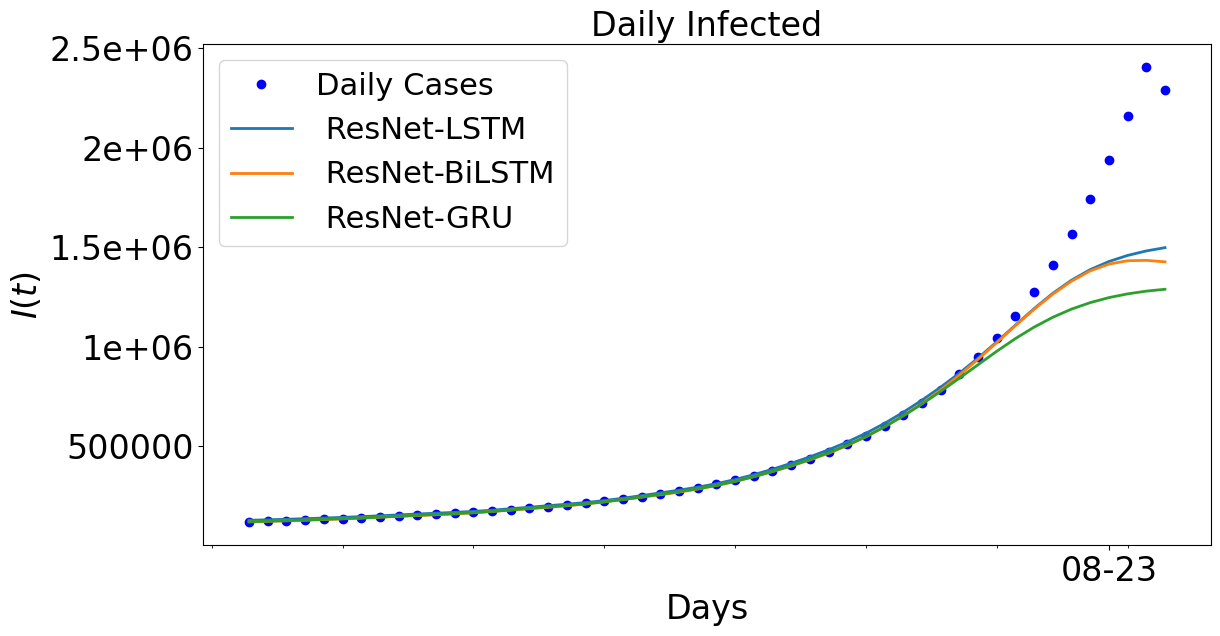

In [20]:
stime ='2023-06-16'
st=dates.datestr2num(stime)
dtrange=np.arange(len(z) - 4)
dtrange =dtrange +st 
font = 24
fig, ax = plt.subplots() 
ax.plot(dtrange,realDat[4:] , 'ob',  lw=2,label='Daily Cases')
ax.plot(dtrange, pred_ls6,  lw=2,label =' ResNet-LSTM')
ax.plot(dtrange,pred_bs6,  lw=2,label=' ResNet-BiLSTM')
ax.plot(dtrange,pred_gs6,  lw=2,label =' ResNet-GRU')
ax.xaxis.set_major_locator(dates.MonthLocator(interval=2))
ax.xaxis.set_major_formatter(dates.DateFormatter('%m-%y'))
ax.xaxis.set_minor_locator(dates.DayLocator(interval=7))
ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
ax.legend(fontsize=22)
ax.tick_params(axis='both', labelsize = 24)
ax.set_xlabel('Days', fontsize = font)
ax.set_ylabel('$I(t)$', fontsize = font) 
ax.set_title('Daily Infected',  fontsize = font)
fig.set_size_inches(w=13,h=6.5)
plt.show()

## Comparison of Actual values to DINN Learned Parameters

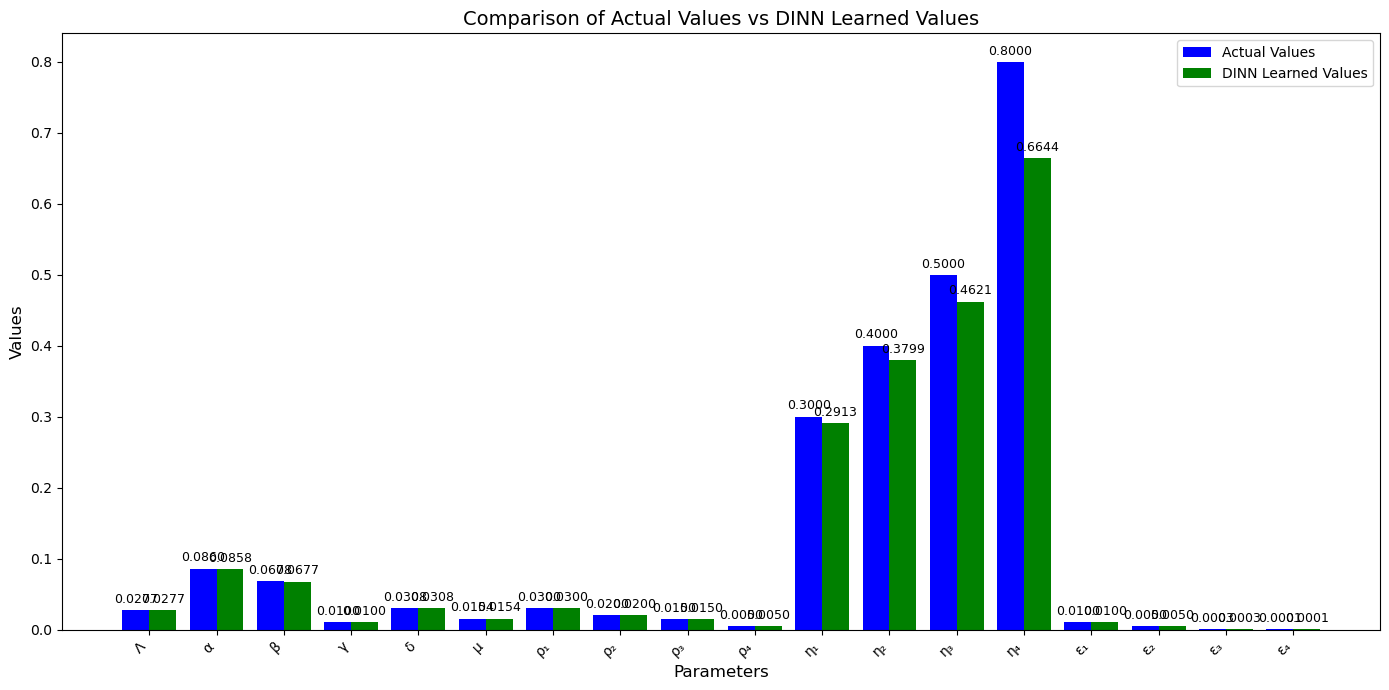

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Parameters and their values
parameters = [
    "Λ", "α", "β", "γ", "δ", "μ", 
    "ρ₁", "ρ₂", "ρ₃", "ρ₄", 
    "η₁", "η₂", "η₃", "η₄", 
    "ε₁", "ε₂", "ε₃", "ε₄"
]

actual_values = [
    0.0277, 0.086, 0.067841, 0.01, 0.0308, 0.0154, 
    0.03, 0.02, 0.015, 0.005, 
    0.3, 0.4, 0.5, 0.8, 
    0.01, 0.005, 0.0003, 0.0001
]

dinn_learned_values = [
    0.0277, 0.0858, 0.0677, 0.01, 0.0308, 0.0154, 
    0.03, 0.02, 0.015, 0.005, 
    0.2913, 0.3799, 0.4621, 0.6644, 
    0.01, 0.005, 0.0003, 0.0001
]

# Positions for the bars
x = np.arange(len(parameters))

# Width of a bar
width = 0.4

# Plotting the bar graphs
fig, ax = plt.subplots(figsize=(14, 7))

# Actual Values bars
bars1 = ax.bar(x - width/2, actual_values, width, label='Actual Values', color='b')

# DINN Learned Values bars
bars2 = ax.bar(x + width/2, dinn_learned_values, width, label='DINN Learned Values', color='g')

# Adding labels and title
ax.set_xlabel('Parameters', fontsize=12)
ax.set_ylabel('Values', fontsize=12)
ax.set_title('Comparison of Actual Values vs DINN Learned Values', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(parameters, rotation=45, ha='right', fontsize=10)
ax.legend()

# Adding value labels on top of the bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=9)

add_value_labels(bars1)
add_value_labels(bars2)

# Display the plot
plt.tight_layout()
plt.show()


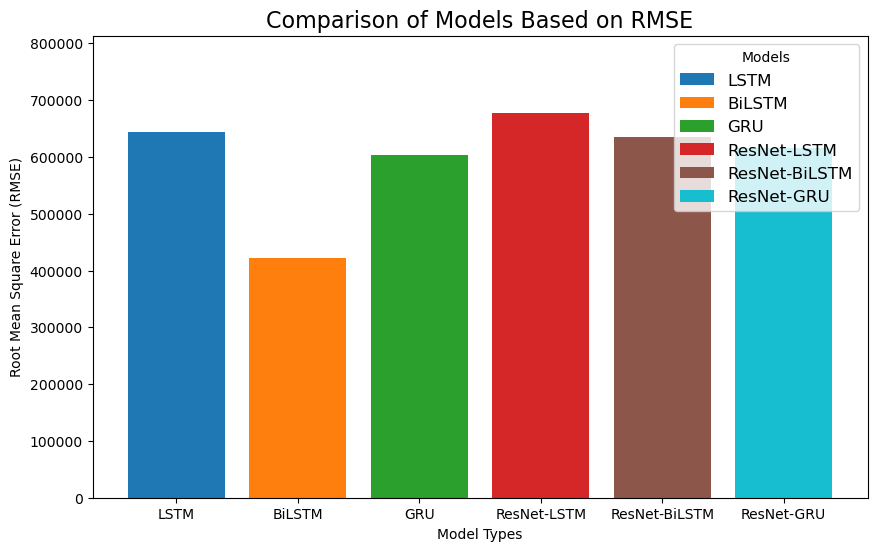

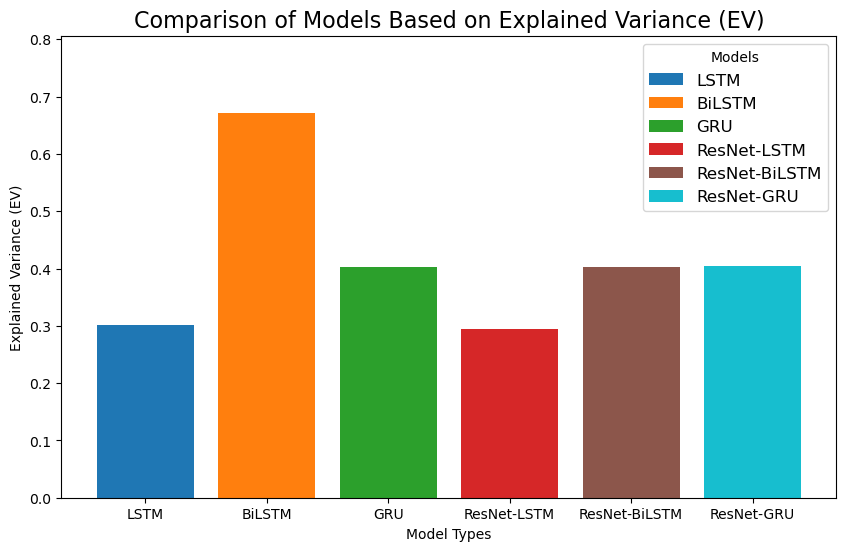

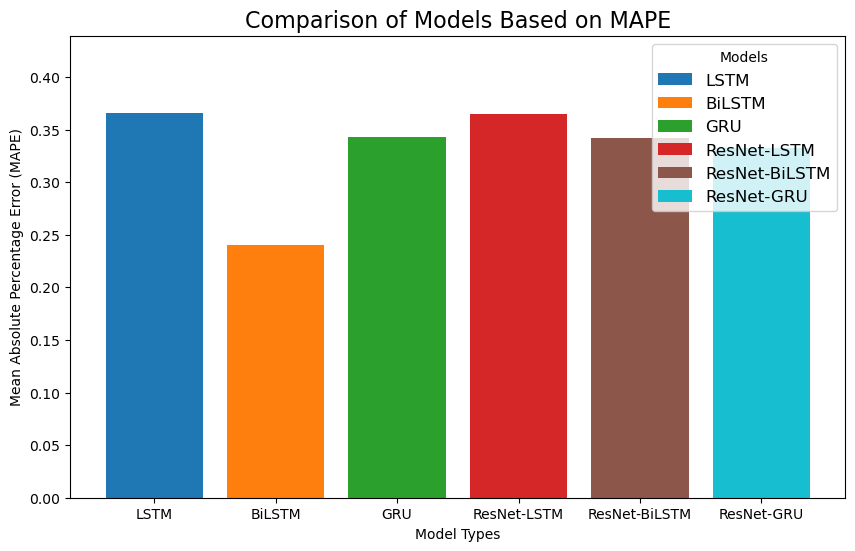

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Define model names and corresponding metric values
model_names = ['LSTM', 'BiLSTM', 'GRU', 'ResNet-LSTM', 'ResNet-BiLSTM', 'ResNet-GRU']

# Example metrics values (replace these with actual computed values)
rmse_values = [644312.756, 421495.166, 603323.937, 677850.125, 634516.25, 615500.875]
ev_values = [0.302, 0.672, 0.403, 0.295, 0.403, 0.405]
mape_values = [0.366, 0.240, 0.343, 0.365, 0.342, 0.332]

# Define colors for each model
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#8c564b', '#17becf' ]  # LSTM: Blue, BiLSTM: Orange, GRU: Green

def plot_metric(metric_values, metric_name, ylabel):
    plt.figure(figsize=(10, 6))

    bars = plt.bar(model_names, metric_values, color=colors)

    # Adding value labels on top of the bars
    for bar in bars:
        yval = bar.get_height()
        #plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, yval + 0.01, round(yval, 4), va='bottom', fontsize=12)
    
    plt.xlabel('Model Types', fontsize=10)
    plt.ylabel(ylabel, fontsize=10)
    plt.title(f'Comparison of Models Based on {metric_name}', fontsize=16)
    plt.ylim(0, max(metric_values) * 1.2)  # Extend y-axis limit to add space for labels
    
    # Add legend to specify which color corresponds to which model
    plt.legend(bars, model_names, title="Models", fontsize=12, loc='upper right')
    
    plt.show()

# Plotting RMSE
plot_metric(rmse_values, 'RMSE', 'Root Mean Square Error (RMSE)')

# Plotting Explained Variance (EV)
plot_metric(ev_values, 'Explained Variance (EV)', 'Explained Variance (EV)')

# Plotting MAPE
plot_metric(mape_values, 'MAPE', 'Mean Absolute Percentage Error (MAPE)')


## Cross Validation

0
0
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 2.260e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 4.799e-07
Epoch: 1000, loss: 2.650e-07
Epoch: 1500, loss: 1.878e-07
Epoch: 2000, loss: 1.707e-07
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.510219573974609
1
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 1.305e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 9.049e-07
Epoch: 1000, loss: 7.131e-07
Epoch: 1500, loss: 5.393e-07
Epoch: 2000, loss: 4.131e-07
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.3778159618377686
2
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 2.960e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.971e-06
Epoch: 1000, loss: 1.222e-06
Epoch: 1500, loss: 8.229e-07
Epoch: 2000, loss: 6.854e-07
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.247932434082031
3
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 2.378e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.934e-06
Epoch: 1000, loss: 1.301e-06
Epoch: 1500, loss: 8.216e-07
Epoch: 2000, loss: 5.650e-07
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.342043399810791
Average RMSE score 0.0034219196531921625 for ResNet-LSTM
std score 0.004913651384413242 for ResNet-LSTM
Total Cross Val Time 54.23
0
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 1.380e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 2.112e-06
Epoch: 1000, loss: 6.549e-07
Epoch: 1500, loss: 1.565e-06
Epoch: 2000, loss: 2.074e-07
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.22444748878479
1
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 4.455e-02


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.434e-07
Epoch: 1000, loss: 1.405e-07
Epoch: 1500, loss: 1.320e-07
Epoch: 2000, loss: 6.819e-06
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.47530460357666
2
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 1.149e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 2.077e-06
Epoch: 1000, loss: 7.955e-07
Epoch: 1500, loss: 4.922e-07
Epoch: 2000, loss: 4.643e-07
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.573125123977661
3
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 2.804e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.109e-06
Epoch: 1000, loss: 8.719e-07
Epoch: 1500, loss: 6.443e-07
Epoch: 2000, loss: 4.705e-07
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.309041738510132
Average RMSE score 0.008992713876068592 for ResNet-BiLSTM
std score 0.014377773739397526 for ResNet-BiLSTM
Total Cross Val Time 93.91
0
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 2.951e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 7.679e-06
Epoch: 1000, loss: 5.386e-06
Epoch: 1500, loss: 2.544e-06
Epoch: 2000, loss: 5.916e-07
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.623544931411743
1
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 1.448e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 4.090e-07
Epoch: 1000, loss: 2.390e-07
Epoch: 1500, loss: 2.294e-07
Epoch: 2000, loss: 2.225e-07
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.617023229598999
2
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 1.821e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.238e-05
Epoch: 1000, loss: 9.812e-06
Epoch: 1500, loss: 5.758e-06
Epoch: 2000, loss: 1.345e-06
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.610320091247559
3
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 2.803e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 8.673e-07
Epoch: 1000, loss: 7.848e-07
Epoch: 1500, loss: 6.811e-07
Epoch: 2000, loss: 5.741e-07
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.571000814437866
Average RMSE score 0.009364659897983074 for ResNet-GRU
std score 0.013217379339039326 for ResNet-GRU
Total Cross Val Time 46.20
1
0
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 2.874e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 4.853e-07
Epoch: 1000, loss: 2.915e-07
Epoch: 1500, loss: 2.050e-07
Epoch: 2000, loss: 1.814e-07
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.43010950088501
1
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 3.089e-02


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 3.977e-07
Epoch: 1000, loss: 3.613e-07
Epoch: 1500, loss: 3.415e-07
Epoch: 2000, loss: 3.245e-07
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.3846635818481445
2
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 4.280e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 2.309e-06
Epoch: 1000, loss: 1.411e-06
Epoch: 1500, loss: 8.766e-07
Epoch: 2000, loss: 6.735e-07
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.525449991226196
3
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 9.237e-02


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 7.845e-07
Epoch: 1000, loss: 7.095e-07
Epoch: 1500, loss: 5.347e-07
Epoch: 2000, loss: 4.843e-07
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.713575839996338
4
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 1.183e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 4.313e-07
Epoch: 1000, loss: 3.594e-07
Epoch: 1500, loss: 3.535e-07
Epoch: 2000, loss: 6.978e-06
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.621140003204346
Average RMSE score 0.006969886366277933 for ResNet-LSTM
std score 0.008915920741856098 for ResNet-LSTM
Total Cross Val Time 82.41
0
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 1.663e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 5.770e-07
Epoch: 1000, loss: 4.347e-07
Epoch: 1500, loss: 4.059e-07
Epoch: 2000, loss: 3.894e-07
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.244436502456665
1
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 7.990e-02


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 3.017e-07
Epoch: 1000, loss: 2.749e-07
Epoch: 1500, loss: 2.466e-07
Epoch: 2000, loss: 2.210e-07
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.13940167427063
2
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 1.573e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 7.161e-07
Epoch: 1000, loss: 5.307e-07
Epoch: 1500, loss: 5.059e-07
Epoch: 2000, loss: 5.043e-07
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.153678894042969
3
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 1.260e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 6.392e-07
Epoch: 1000, loss: 5.529e-07
Epoch: 1500, loss: 4.656e-07
Epoch: 2000, loss: 3.763e-07
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.420434951782227
4
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 3.122e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 3.039e-07
Epoch: 1000, loss: 2.698e-07
Epoch: 1500, loss: 2.496e-07
Epoch: 2000, loss: 2.421e-07
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.46130919456482
Average RMSE score 0.0047299726866185665 for ResNet-BiLSTM
std score 0.006000518333166838 for ResNet-BiLSTM
Total Cross Val Time 138.71
0
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 2.813e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 9.205e-06
Epoch: 1000, loss: 6.252e-06
Epoch: 1500, loss: 2.392e-06
Epoch: 2000, loss: 3.912e-07
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.633506536483765
1
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 3.221e-02


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 5.030e-07
Epoch: 1000, loss: 3.588e-07
Epoch: 1500, loss: 3.468e-07
Epoch: 2000, loss: 3.307e-07
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.627110242843628
2
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 1.370e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 6.823e-06
Epoch: 1000, loss: 4.056e-06
Epoch: 1500, loss: 1.379e-06
Epoch: 2000, loss: 4.451e-07
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.603230714797974
3
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 1.040e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 3.213e-06
Epoch: 1000, loss: 3.118e-06
Epoch: 1500, loss: 2.985e-06
Epoch: 2000, loss: 2.717e-06
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.599847793579102
4
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 1.636e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 2.306e-06
Epoch: 1000, loss: 1.795e-06
Epoch: 1500, loss: 1.184e-06
Epoch: 2000, loss: 5.873e-07
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.556244611740112
Average RMSE score 0.014210392720997334 for ResNet-GRU
std score 0.021912505850195885 for ResNet-GRU
Total Cross Val Time 69.47
2
0
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 1.789e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 2.628e-06
Epoch: 1000, loss: 7.782e-07
Epoch: 1500, loss: 4.606e-07
Epoch: 2000, loss: 4.355e-07
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.531122207641602
1
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 1.649e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 2.088e-06
Epoch: 1000, loss: 6.370e-07
Epoch: 1500, loss: 3.526e-07
Epoch: 2000, loss: 3.215e-07
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.623553514480591
2
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 2.191e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 2.818e-06
Epoch: 1000, loss: 8.007e-07
Epoch: 1500, loss: 4.999e-07
Epoch: 2000, loss: 4.699e-07
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.599416017532349
3
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 1.433e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 6.179e-07
Epoch: 1000, loss: 5.692e-07
Epoch: 1500, loss: 5.193e-07
Epoch: 2000, loss: 4.692e-07
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.3478734493255615
4
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 2.832e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.965e-06
Epoch: 1000, loss: 9.115e-07
Epoch: 1500, loss: 7.962e-07
Epoch: 2000, loss: 7.484e-07
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.392290830612183
5
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 1.200e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 5.007e-07
Epoch: 1000, loss: 4.891e-07
Epoch: 1500, loss: 4.841e-07
Epoch: 2000, loss: 4.809e-07
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.3841798305511475
Average RMSE score 0.001790571608580649 for ResNet-LSTM
std score 0.001991045428439975 for ResNet-LSTM
Total Cross Val Time 116.03
0
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 1.785e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 5.215e-07
Epoch: 1000, loss: 3.865e-07
Epoch: 1500, loss: 3.620e-07
Epoch: 2000, loss: 3.584e-07
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.166955947875977
1
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 1.446e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 3.128e-06
Epoch: 1000, loss: 1.457e-06
Epoch: 1500, loss: 4.963e-07
Epoch: 2000, loss: 2.676e-07
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.596753597259521
2
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 1.547e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.757e-06
Epoch: 1000, loss: 6.269e-07
Epoch: 1500, loss: 5.329e-07
Epoch: 2000, loss: 5.075e-07
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.355603694915771
3
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 2.710e-02


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 3.240e-07
Epoch: 1000, loss: 2.931e-07
Epoch: 1500, loss: 2.806e-07
Epoch: 2000, loss: 4.184e-07
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.311730146408081
4
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 2.817e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 5.249e-07
Epoch: 1000, loss: 5.070e-07
Epoch: 1500, loss: 4.922e-07
Epoch: 2000, loss: 4.752e-07
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.26258134841919
5
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 1.368e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.895e-06
Epoch: 1000, loss: 8.774e-07
Epoch: 1500, loss: 4.450e-07
Epoch: 2000, loss: 3.724e-07
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.218916893005371
Average RMSE score 0.009596948511898518 for ResNet-BiLSTM
std score 0.019941823557019234 for ResNet-BiLSTM
Total Cross Val Time 196.12
0
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 1.526e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 8.279e-06
Epoch: 1000, loss: 4.398e-06
Epoch: 1500, loss: 9.238e-07
Epoch: 2000, loss: 3.520e-07
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.62299656867981
1
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 1.667e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.310e-05
Epoch: 1000, loss: 1.088e-05
Epoch: 1500, loss: 6.675e-06
Epoch: 2000, loss: 1.204e-06
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.575649261474609
2
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 2.036e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.194e-05
Epoch: 1000, loss: 9.445e-06
Epoch: 1500, loss: 5.630e-06
Epoch: 2000, loss: 1.511e-06
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.586792230606079
3
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 6.172e-02


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 4.995e-07
Epoch: 1000, loss: 3.987e-07
Epoch: 1500, loss: 3.906e-07
Epoch: 2000, loss: 3.827e-07
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.597002029418945
4
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 2.030e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 6.314e-06
Epoch: 1000, loss: 3.144e-06
Epoch: 1500, loss: 8.777e-07
Epoch: 2000, loss: 3.965e-07
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.725119352340698
5
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 1.555e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 7.551e-06
Epoch: 1000, loss: 4.724e-06
Epoch: 1500, loss: 1.967e-06
Epoch: 2000, loss: 6.147e-07
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.579450845718384
Average RMSE score 0.01468709483742714 for ResNet-GRU
std score 0.03074624389410019 for ResNet-GRU
Total Cross Val Time 97.18
3
0
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 1.274e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 8.939e-07
Epoch: 1000, loss: 4.485e-07
Epoch: 1500, loss: 3.663e-07
Epoch: 2000, loss: 1.536e-06
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.325076580047607
1
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 1.820e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 2.961e-06
Epoch: 1000, loss: 6.971e-07
Epoch: 1500, loss: 3.445e-07
Epoch: 2000, loss: 9.576e-07
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.713284015655518
2
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 9.571e-02


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 9.605e-07
Epoch: 1000, loss: 5.378e-07
Epoch: 1500, loss: 3.803e-07
Epoch: 2000, loss: 3.771e-07
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.413696527481079
3
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 3.944e-02


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 4.255e-07
Epoch: 1000, loss: 4.194e-07
Epoch: 1500, loss: 9.241e-06
Epoch: 2000, loss: 4.810e-07
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.403136968612671
4
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 2.498e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 3.138e-06
Epoch: 1000, loss: 8.469e-07
Epoch: 1500, loss: 5.537e-07
Epoch: 2000, loss: 5.343e-07
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.387925148010254
5
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 3.328e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 3.644e-06
Epoch: 1000, loss: 1.225e-06
Epoch: 1500, loss: 5.779e-07
Epoch: 2000, loss: 4.746e-07
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.349364519119263
6
####### ResNet-LSTM bootstrap for TN #######
Epoch: 0, loss: 8.280e-02


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 6.066e-06
Epoch: 1000, loss: 5.868e-07
Epoch: 1500, loss: 4.848e-07
Epoch: 2000, loss: 6.348e-05
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.367129802703857
Average RMSE score 0.0018552382243797183 for ResNet-LSTM
std score 0.002755781402811408 for ResNet-LSTM
Total Cross Val Time 152.73
0
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 2.455e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 5.593e-07
Epoch: 1000, loss: 4.244e-07
Epoch: 1500, loss: 3.645e-07
Epoch: 2000, loss: 3.494e-07
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.221699953079224
1
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 1.408e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.294e-06
Epoch: 1000, loss: 5.011e-07
Epoch: 1500, loss: 3.663e-07
Epoch: 2000, loss: 3.453e-07
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.2893226146698
2
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 1.327e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 9.008e-07
Epoch: 1000, loss: 3.860e-07
Epoch: 1500, loss: 3.388e-07
Epoch: 2000, loss: 7.051e-06
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.327730894088745
3
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 9.528e-02


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 3.750e-07
Epoch: 1000, loss: 2.034e-07
Epoch: 1500, loss: 2.028e-07
Epoch: 2000, loss: 2.020e-07
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.464437484741211
4
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 1.553e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.576e-06
Epoch: 1000, loss: 5.111e-07
Epoch: 1500, loss: 4.182e-07
Epoch: 2000, loss: 3.976e-07
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.98322081565857
5
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 1.120e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.153e-06
Epoch: 1000, loss: 4.312e-07
Epoch: 1500, loss: 3.680e-07
Epoch: 2000, loss: 3.631e-07
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.484998941421509
6
####### ResNet-BiLSTM bootstrap for TN #######
Epoch: 0, loss: 8.993e-02


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 9.777e-07
Epoch: 1000, loss: 8.611e-07
Epoch: 1500, loss: 6.153e-07
Epoch: 2000, loss: 7.154e-07
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.899850130081177
Average RMSE score 0.01006014458835125 for ResNet-BiLSTM
std score 0.02123289369046688 for ResNet-BiLSTM
Total Cross Val Time 263.65
0
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 1.057e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 5.896e-06
Epoch: 1000, loss: 2.970e-06
Epoch: 1500, loss: 7.449e-07
Epoch: 2000, loss: 3.212e-07
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.702259540557861
1
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 1.757e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 6.709e-06
Epoch: 1000, loss: 3.872e-06
Epoch: 1500, loss: 1.034e-06
Epoch: 2000, loss: 1.999e-07
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.702390432357788
2
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 2.128e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 6.721e-06
Epoch: 1000, loss: 4.569e-06
Epoch: 1500, loss: 2.166e-06
Epoch: 2000, loss: 6.310e-07
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.634804725646973
3
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 1.302e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 4.411e-07
Epoch: 1000, loss: 3.707e-07
Epoch: 1500, loss: 3.673e-07
Epoch: 2000, loss: 3.637e-07
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.742672443389893
4
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 1.836e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 7.840e-06
Epoch: 1000, loss: 4.322e-06
Epoch: 1500, loss: 1.450e-06
Epoch: 2000, loss: 4.299e-07
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.673262357711792
5
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 1.350e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 9.455e-06
Epoch: 1000, loss: 6.887e-06
Epoch: 1500, loss: 3.004e-06
Epoch: 2000, loss: 5.198e-07
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.763800621032715
6
####### ResNet-GRU bootstrap for TN #######
Epoch: 0, loss: 2.621e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 4.330e-07
Epoch: 1000, loss: 4.151e-07
Epoch: 1500, loss: 3.938e-07
Epoch: 2000, loss: 3.727e-07
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.7540602684021
Average RMSE score 0.010085503570735455 for ResNet-GRU
std score 0.02190830558538437 for ResNet-GRU
Total Cross Val Time 131.95


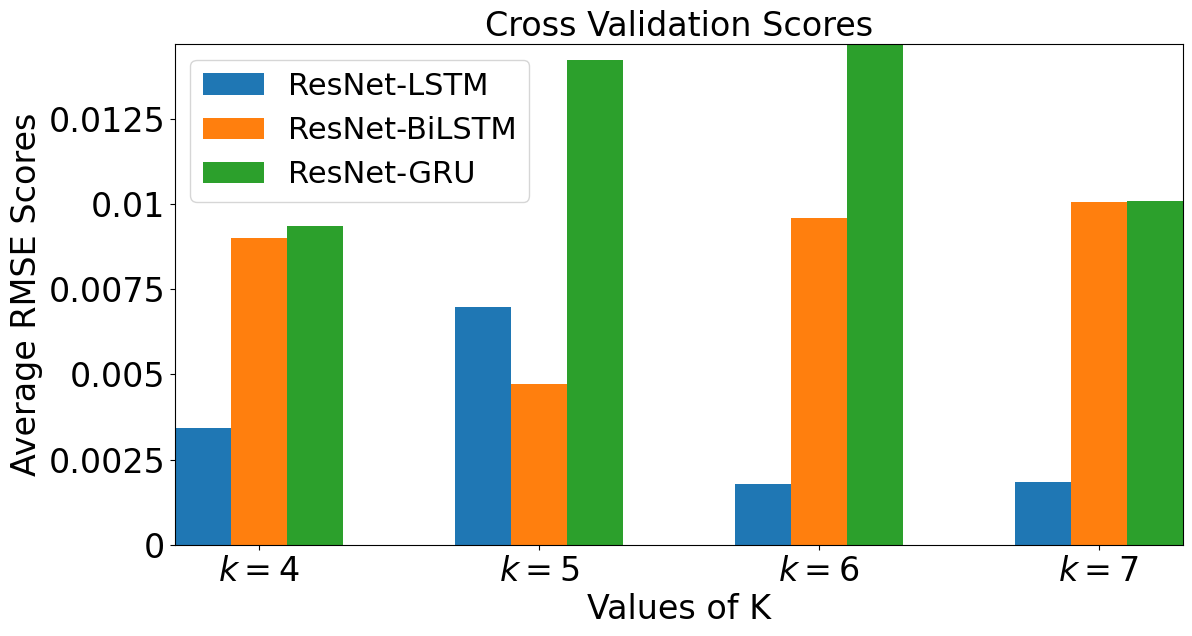

In [27]:
plot_cross_val([4,5, 6, 7], out, resnetDat, "TN")

0
0
####### LSTM bootstrap for TN #######
Epoch: 0, loss: 1.178e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 4.216e-06
Epoch: 1000, loss: 1.177e-06
Epoch: 1500, loss: 3.539e-07
Epoch: 2000, loss: 3.700e-07
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.340257883071899
1
####### LSTM bootstrap for TN #######
Epoch: 0, loss: 3.610e-02


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.695e-07
Epoch: 1000, loss: 1.510e-07
Epoch: 1500, loss: 2.965e-05
Epoch: 2000, loss: 1.633e-07
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.361762285232544
2
####### LSTM bootstrap for TN #######
Epoch: 0, loss: 1.180e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 4.163e-06
Epoch: 1000, loss: 1.336e-06
Epoch: 1500, loss: 3.756e-07
Epoch: 2000, loss: 2.750e-07
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.477077007293701
3
####### LSTM bootstrap for TN #######
Epoch: 0, loss: 1.750e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 7.790e-07
Epoch: 1000, loss: 4.808e-07
Epoch: 1500, loss: 2.394e-07
Epoch: 2000, loss: 9.893e-08
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.407467365264893
Average RMSE score 0.007838312536478043 for LSTM
std score 0.011025269515812397 for LSTM
Total Cross Val Time 54.06
0
####### BiLSTM bootstrap for TN #######
Epoch: 0, loss: 1.285e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 8.779e-06
Epoch: 1000, loss: 2.350e-06
Epoch: 1500, loss: 4.104e-07
Epoch: 2000, loss: 4.535e-07
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.166434526443481
1
####### BiLSTM bootstrap for TN #######
Epoch: 0, loss: 5.998e-02


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 4.403e-08
Epoch: 1000, loss: 3.297e-08
Epoch: 1500, loss: 3.191e-08
Epoch: 2000, loss: 1.387e-05
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.156511545181274
2
####### BiLSTM bootstrap for TN #######
Epoch: 0, loss: 1.559e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 6.200e-06
Epoch: 1000, loss: 1.396e-06
Epoch: 1500, loss: 5.724e-07
Epoch: 2000, loss: 5.187e-07
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.286635398864746
3
####### BiLSTM bootstrap for TN #######
Epoch: 0, loss: 1.982e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.370e-07
Epoch: 1000, loss: 9.325e-08
Epoch: 1500, loss: 5.748e-08
Epoch: 2000, loss: 3.595e-08
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.16800856590271
Average RMSE score 0.019724151119589806 for BiLSTM
std score 0.03087739273905754 for BiLSTM
Total Cross Val Time 91.93
0
####### GRU bootstrap for TN #######
Epoch: 0, loss: 2.276e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 9.872e-06
Epoch: 1000, loss: 4.097e-06
Epoch: 1500, loss: 7.632e-07
Epoch: 2000, loss: 2.502e-07
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.602739095687866
1
####### GRU bootstrap for TN #######
Epoch: 0, loss: 3.960e-02


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.132e-07
Epoch: 1000, loss: 1.066e-07
Epoch: 1500, loss: 2.159e-07
Epoch: 2000, loss: 8.851e-08
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.613471031188965
2
####### GRU bootstrap for TN #######
Epoch: 0, loss: 1.430e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.438e-05
Epoch: 1000, loss: 7.658e-06
Epoch: 1500, loss: 6.720e-06
Epoch: 2000, loss: 2.003e-07
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.5819091796875
3
####### GRU bootstrap for TN #######
Epoch: 0, loss: 1.090e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 3.647e-06
Epoch: 1000, loss: 3.422e-06
Epoch: 1500, loss: 3.025e-06
Epoch: 2000, loss: 2.308e-06
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.559763669967651
Average RMSE score 0.02359786629676819 for GRU
std score 0.03438160941004753 for GRU
Total Cross Val Time 46.00
1
0
####### LSTM bootstrap for TN #######
Epoch: 0, loss: 1.343e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 2.152e-06
Epoch: 1000, loss: 9.888e-07
Epoch: 1500, loss: 4.943e-07
Epoch: 2000, loss: 4.002e-07
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.735510587692261
1
####### LSTM bootstrap for TN #######
Epoch: 0, loss: 3.147e-02


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 5.875e-08
Epoch: 1000, loss: 9.781e-07
Epoch: 1500, loss: 6.940e-08
Epoch: 2000, loss: 7.439e-08
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.500212907791138
2
####### LSTM bootstrap for TN #######
Epoch: 0, loss: 8.291e-02


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 5.655e-06
Epoch: 1000, loss: 2.031e-06
Epoch: 1500, loss: 3.025e-07
Epoch: 2000, loss: 2.711e-07
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.6693434715271
3
####### LSTM bootstrap for TN #######
Epoch: 0, loss: 1.142e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.248e-07
Epoch: 1000, loss: 8.620e-08
Epoch: 1500, loss: 7.738e-07
Epoch: 2000, loss: 7.704e-08
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.393768548965454
4
####### LSTM bootstrap for TN #######
Epoch: 0, loss: 1.115e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 4.880e-06
Epoch: 1000, loss: 3.088e-08
Epoch: 1500, loss: 3.951e-05
Epoch: 2000, loss: 1.345e-07
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.353887319564819
Average RMSE score 0.007708508521318436 for LSTM
std score 0.01301371119916439 for LSTM
Total Cross Val Time 84.06
0
####### BiLSTM bootstrap for TN #######
Epoch: 0, loss: 9.864e-02


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.476e-05
Epoch: 1000, loss: 3.626e-06
Epoch: 1500, loss: 1.051e-06
Epoch: 2000, loss: 2.882e-07
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.33165168762207
1
####### BiLSTM bootstrap for TN #######
Epoch: 0, loss: 5.758e-02


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.424e-07
Epoch: 1000, loss: 1.961e-08
Epoch: 1500, loss: 1.959e-08
Epoch: 2000, loss: 1.927e-08
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.19497299194336
2
####### BiLSTM bootstrap for TN #######
Epoch: 0, loss: 1.734e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.151e-05
Epoch: 1000, loss: 2.324e-06
Epoch: 1500, loss: 5.672e-07
Epoch: 2000, loss: 4.992e-07
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.158275127410889
3
####### BiLSTM bootstrap for TN #######
Epoch: 0, loss: 2.437e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.744e-07
Epoch: 1000, loss: 1.002e-07
Epoch: 1500, loss: 4.702e-08
Epoch: 2000, loss: 2.201e-08
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.109107255935669
4
####### BiLSTM bootstrap for TN #######
Epoch: 0, loss: 2.075e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 3.765e-09
Epoch: 1000, loss: 3.421e-09
Epoch: 1500, loss: 3.240e-09
Epoch: 2000, loss: 3.184e-09
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.141119480133057
Average RMSE score 0.0179133340716362 for BiLSTM
std score 0.030557334423065186 for BiLSTM
Total Cross Val Time 138.55
0
####### GRU bootstrap for TN #######
Epoch: 0, loss: 8.947e-02


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 2.148e-05
Epoch: 1000, loss: 1.184e-05
Epoch: 1500, loss: 5.602e-07
Epoch: 2000, loss: 1.805e-07
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.590359210968018
1
####### GRU bootstrap for TN #######
Epoch: 0, loss: 1.586e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 4.308e-08
Epoch: 1000, loss: 3.728e-08
Epoch: 1500, loss: 3.708e-08
Epoch: 2000, loss: 3.686e-08
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.62090277671814
2
####### GRU bootstrap for TN #######
Epoch: 0, loss: 1.075e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 3.459e-05
Epoch: 1000, loss: 1.288e-05
Epoch: 1500, loss: 3.255e-06
Epoch: 2000, loss: 3.478e-07
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.607735633850098
3
####### GRU bootstrap for TN #######
Epoch: 0, loss: 2.251e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 4.220e-06
Epoch: 1000, loss: 3.715e-06
Epoch: 1500, loss: 3.079e-06
Epoch: 2000, loss: 2.308e-06
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.62850284576416
4
####### GRU bootstrap for TN #######
Epoch: 0, loss: 1.979e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 4.180e-06
Epoch: 1000, loss: 3.287e-06
Epoch: 1500, loss: 2.176e-06
Epoch: 2000, loss: 1.119e-06
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.638492584228516
Average RMSE score 0.013578495010733604 for GRU
std score 0.018898749724030495 for GRU
Total Cross Val Time 69.22
2
0
####### LSTM bootstrap for TN #######
Epoch: 0, loss: 2.268e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 7.926e-07
Epoch: 1000, loss: 4.998e-07
Epoch: 1500, loss: 3.976e-07
Epoch: 2000, loss: 3.755e-07
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.334358215332031
1
####### LSTM bootstrap for TN #######
Epoch: 0, loss: 8.976e-02


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 3.993e-06
Epoch: 1000, loss: 1.488e-06
Epoch: 1500, loss: 2.724e-07
Epoch: 2000, loss: 2.493e-07
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.319827556610107
2
####### LSTM bootstrap for TN #######
Epoch: 0, loss: 1.097e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 4.394e-07
Epoch: 1000, loss: 4.431e-06
Epoch: 1500, loss: 4.184e-07
Epoch: 2000, loss: 3.949e-07
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.4170215129852295
3
####### LSTM bootstrap for TN #######
Epoch: 0, loss: 2.671e-02


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 5.948e-08
Epoch: 1000, loss: 6.789e-08
Epoch: 1500, loss: 1.358e-06
Epoch: 2000, loss: 5.427e-08
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.543534278869629
4
####### LSTM bootstrap for TN #######
Epoch: 0, loss: 1.493e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.288e-06
Epoch: 1000, loss: 7.748e-07
Epoch: 1500, loss: 6.774e-07
Epoch: 2000, loss: 6.320e-07
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.738139867782593
5
####### LSTM bootstrap for TN #######
Epoch: 0, loss: 1.329e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 4.680e-07
Epoch: 1000, loss: 4.357e-07
Epoch: 1500, loss: 4.173e-07
Epoch: 2000, loss: 4.212e-07
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.891403913497925
Average RMSE score 0.012169594876468182 for LSTM
std score 0.026570135727524757 for LSTM
Total Cross Val Time 114.46
0
####### BiLSTM bootstrap for TN #######
Epoch: 0, loss: 1.924e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 2.693e-06
Epoch: 1000, loss: 1.042e-06
Epoch: 1500, loss: 5.075e-07
Epoch: 2000, loss: 4.367e-07
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.218498229980469
1
####### BiLSTM bootstrap for TN #######
Epoch: 0, loss: 8.611e-02


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 6.127e-06
Epoch: 1000, loss: 5.243e-07
Epoch: 1500, loss: 2.583e-07
Epoch: 2000, loss: 3.618e-06
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.139854431152344
2
####### BiLSTM bootstrap for TN #######
Epoch: 0, loss: 1.565e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.156e-06
Epoch: 1000, loss: 6.656e-07
Epoch: 1500, loss: 5.950e-07
Epoch: 2000, loss: 5.691e-07
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.18140172958374
3
####### BiLSTM bootstrap for TN #######
Epoch: 0, loss: 2.667e-02


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 6.778e-08
Epoch: 1000, loss: 3.668e-08
Epoch: 1500, loss: 3.522e-08
Epoch: 2000, loss: 9.155e-08
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.064546823501587
4
####### BiLSTM bootstrap for TN #######
Epoch: 0, loss: 1.127e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 4.341e-06
Epoch: 1000, loss: 7.689e-07
Epoch: 1500, loss: 4.341e-07
Epoch: 2000, loss: 4.014e-07
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.16452956199646
5
####### BiLSTM bootstrap for TN #######
Epoch: 0, loss: 1.019e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.369e-06
Epoch: 1000, loss: 7.345e-06
Epoch: 1500, loss: 5.473e-07
Epoch: 2000, loss: 5.329e-07
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.276762008666992
Average RMSE score 0.017000781372189522 for BiLSTM
std score 0.03671000525355339 for BiLSTM
Total Cross Val Time 192.61
0
####### GRU bootstrap for TN #######
Epoch: 0, loss: 2.349e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.003e-05
Epoch: 1000, loss: 5.441e-06
Epoch: 1500, loss: 1.406e-06
Epoch: 2000, loss: 3.615e-07
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.658216953277588
1
####### GRU bootstrap for TN #######
Epoch: 0, loss: 2.403e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.849e-05
Epoch: 1000, loss: 8.241e-06
Epoch: 1500, loss: 1.371e-06
Epoch: 2000, loss: 2.327e-07
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.610672235488892
2
####### GRU bootstrap for TN #######
Epoch: 0, loss: 1.203e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.856e-05
Epoch: 1000, loss: 1.049e-05
Epoch: 1500, loss: 8.688e-07
Epoch: 2000, loss: 1.644e-07
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.5950844287872314
3
####### GRU bootstrap for TN #######
Epoch: 0, loss: 2.936e-02


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 2.610e-07
Epoch: 1000, loss: 1.658e-07
Epoch: 1500, loss: 1.583e-07
Epoch: 2000, loss: 1.053e-04
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.656245946884155
4
####### GRU bootstrap for TN #######
Epoch: 0, loss: 9.346e-02


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 2.014e-05
Epoch: 1000, loss: 1.449e-05
Epoch: 1500, loss: 2.247e-06
Epoch: 2000, loss: 2.180e-07
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.640548229217529
5
####### GRU bootstrap for TN #######
Epoch: 0, loss: 8.902e-02


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.740e-05
Epoch: 1000, loss: 1.056e-05
Epoch: 1500, loss: 1.177e-06
Epoch: 2000, loss: 1.786e-07
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.563446521759033
Average RMSE score 0.02406352013349533 for GRU
std score 0.05355149880051613 for GRU
Total Cross Val Time 97.21
3
0
####### LSTM bootstrap for TN #######
Epoch: 0, loss: 2.035e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 2.368e-06
Epoch: 1000, loss: 1.058e-06
Epoch: 1500, loss: 7.547e-07
Epoch: 2000, loss: 6.949e-07
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.439272165298462
1
####### LSTM bootstrap for TN #######
Epoch: 0, loss: 1.883e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 9.865e-07
Epoch: 1000, loss: 5.398e-07
Epoch: 1500, loss: 3.758e-07
Epoch: 2000, loss: 3.433e-07
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.382317304611206
2
####### LSTM bootstrap for TN #######
Epoch: 0, loss: 4.077e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 8.991e-07
Epoch: 1000, loss: 7.315e-07
Epoch: 1500, loss: 6.617e-07
Epoch: 2000, loss: 6.313e-07
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.521842002868652
3
####### LSTM bootstrap for TN #######
Epoch: 0, loss: 1.176e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 3.885e-07
Epoch: 1000, loss: 3.199e-07
Epoch: 1500, loss: 2.531e-07
Epoch: 2000, loss: 1.933e-07
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.791087627410889
4
####### LSTM bootstrap for TN #######
Epoch: 0, loss: 1.966e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 9.898e-07
Epoch: 1000, loss: 6.508e-07
Epoch: 1500, loss: 4.780e-07
Epoch: 2000, loss: 4.242e-07
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.608243465423584
5
####### LSTM bootstrap for TN #######
Epoch: 0, loss: 1.174e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 4.958e-07
Epoch: 1000, loss: 3.539e-07
Epoch: 1500, loss: 3.187e-07
Epoch: 2000, loss: 3.061e-07
<class 'cross_val.LSTM_model'> Total Training Time in seconds 5.598913669586182
6
####### LSTM bootstrap for TN #######
Epoch: 0, loss: 1.016e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.807e-07
Epoch: 1000, loss: 1.487e-07
Epoch: 1500, loss: 1.134e-07
Epoch: 2000, loss: 5.742e-08
<class 'cross_val.LSTM_model'> Total Training Time in seconds 6.172875642776489
Average RMSE score 0.007872923277318478 for LSTM
std score 0.0164823979139328 for LSTM
Total Cross Val Time 155.62
0
####### BiLSTM bootstrap for TN #######
Epoch: 0, loss: 9.650e-02


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 7.218e-06
Epoch: 1000, loss: 2.309e-06
Epoch: 1500, loss: 4.398e-07
Epoch: 2000, loss: 3.364e-07
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.463578224182129
1
####### BiLSTM bootstrap for TN #######
Epoch: 0, loss: 1.193e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 4.502e-06
Epoch: 1000, loss: 8.318e-07
Epoch: 1500, loss: 5.774e-07
Epoch: 2000, loss: 5.144e-07
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.316118001937866
2
####### BiLSTM bootstrap for TN #######
Epoch: 0, loss: 1.863e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.419e-06
Epoch: 1000, loss: 8.164e-07
Epoch: 1500, loss: 6.905e-07
Epoch: 2000, loss: 6.358e-07
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.606365442276001
3
####### BiLSTM bootstrap for TN #######
Epoch: 0, loss: 6.512e-02


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 3.577e-08
Epoch: 1000, loss: 3.550e-08
Epoch: 1500, loss: 3.514e-08
Epoch: 2000, loss: 3.442e-08
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.396900653839111
4
####### BiLSTM bootstrap for TN #######
Epoch: 0, loss: 1.754e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.667e-06
Epoch: 1000, loss: 6.574e-07
Epoch: 1500, loss: 4.603e-07
Epoch: 2000, loss: 4.365e-07
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.406144618988037
5
####### BiLSTM bootstrap for TN #######
Epoch: 0, loss: 1.941e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 6.928e-07
Epoch: 1000, loss: 6.726e-07
Epoch: 1500, loss: 6.501e-07
Epoch: 2000, loss: 6.220e-07
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.364999532699585
6
####### BiLSTM bootstrap for TN #######
Epoch: 0, loss: 1.113e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 7.793e-07
Epoch: 1000, loss: 5.526e-07
Epoch: 1500, loss: 3.151e-07
Epoch: 2000, loss: 1.138e-07
<class 'cross_val.BiLSTM_model'> Total Training Time in seconds 9.39351773262024
Average RMSE score 0.014447258785367012 for BiLSTM
std score 0.03091965988278389 for BiLSTM
Total Cross Val Time 264.32
0
####### GRU bootstrap for TN #######
Epoch: 0, loss: 1.229e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 2.095e-05
Epoch: 1000, loss: 1.560e-05
Epoch: 1500, loss: 4.595e-06
Epoch: 2000, loss: 1.973e-07
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.627877712249756
1
####### GRU bootstrap for TN #######
Epoch: 0, loss: 2.093e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.985e-05
Epoch: 1000, loss: 1.323e-05
Epoch: 1500, loss: 4.554e-06
Epoch: 2000, loss: 4.915e-07
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.651705265045166
2
####### GRU bootstrap for TN #######
Epoch: 0, loss: 1.053e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.879e-05
Epoch: 1000, loss: 1.056e-05
Epoch: 1500, loss: 1.145e-06
Epoch: 2000, loss: 4.691e-07
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.625200986862183
3
####### GRU bootstrap for TN #######
Epoch: 0, loss: 7.812e-02


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.361e-07
Epoch: 1000, loss: 1.191e-07
Epoch: 1500, loss: 1.154e-07
Epoch: 2000, loss: 1.101e-07
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.649000883102417
4
####### GRU bootstrap for TN #######
Epoch: 0, loss: 4.358e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.720e-05
Epoch: 1000, loss: 1.269e-05
Epoch: 1500, loss: 7.341e-06
Epoch: 2000, loss: 2.439e-06
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.5945000648498535
5
####### GRU bootstrap for TN #######
Epoch: 0, loss: 1.177e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 1.583e-05
Epoch: 1000, loss: 8.259e-06
Epoch: 1500, loss: 7.848e-07
Epoch: 2000, loss: 2.114e-07
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.6267876625061035
6
####### GRU bootstrap for TN #######
Epoch: 0, loss: 1.070e-01


C:\Users\iboad\anaconda3\Lib\site-packages\torch\nn\modules\rnn.py:83: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


Epoch: 500, loss: 2.692e-06
Epoch: 1000, loss: 2.435e-06
Epoch: 1500, loss: 2.030e-06
Epoch: 2000, loss: 2.105e-04
<class 'cross_val.GRU_model'> Total Training Time in seconds 4.640685558319092
Average RMSE score 0.01876281015574932 for GRU
std score 0.04415883123874664 for GRU
Total Cross Val Time 129.97


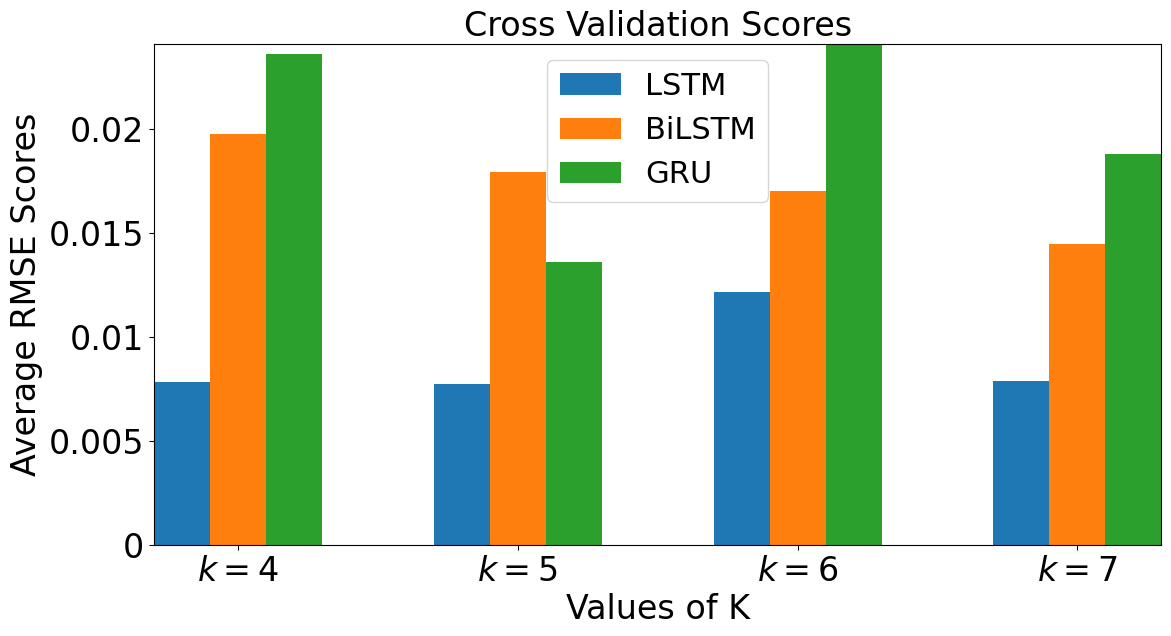

In [29]:
def plot_cross_vals(k, out, data2, cs1):
    l_means1=[]
    b_means1=[]
    g_means1 =[]
    l_cpu1 =[]
    b_cpu1 =[]
    g_cpu1 =[]
    for i in range(len(k)):
        print(i)
        _,_, m_l1, cpu_l1 = cross_validation(k[i], data2, scaler1, 0.8, LSTM_model, cs1, "LSTM")
        _,_, m_b1, cpu_b1 = cross_validation(k[i], data2, scaler1, 0.8, BiLSTM_model, cs1, "BiLSTM")
        _,_, m_g1, cpu_g1= cross_validation(k[i], data2, scaler1, 0.8, GRU_model, cs1, "GRU")
        l_means1.append(m_l1)
        b_means1.append(m_b1)
        g_means1.append(m_g1)
        l_cpu1.append(cpu_l1)
        b_cpu1.append(cpu_b1)
        g_cpu1.append(cpu_g1)
    kv =np.array(k)
    l_cpu1 =np.array(l_cpu1)
    b_cpu1 =np.array(b_cpu1)
    g_cpu1 =np.array(g_cpu1)
    font = 24
    ind = np.arange(len(l_means1))  # the x locations for the groups
    width = 0.2  # the width of the bars

    fig, ax = plt.subplots()
    rects4 = ax.bar(ind - width, tuple(l_means1), width, 
                label='LSTM', align='center')
    rects5 = ax.bar(ind , tuple(b_means1), width, 
                label='BiLSTM', align='center')
    rects6 = ax.bar(ind +width, tuple(g_means1), width, 
                label='GRU', align='center')
    ax.legend(fontsize=22)
    ax.ticklabel_format(axis='y', style='sci', scilimits=(3,3))
    ax.set_xticks(ind)
    ax.set_xticklabels((r'$k=4$', r'$k=5$', r'$k=6$', r'$k=7$'))
    ax.tick_params(axis='both', labelsize = 24)
    ax.set_xlabel('Values of K', fontsize = font)
    ax.set_ylabel('Average RMSE Scores', fontsize = font)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%g'))
    ax.set_title('Cross Validation Scores',  fontsize = font)
    fig.set_size_inches(w=13,h=6.5)
    plt.savefig(out+'crossresnetBar{}.png'.format(cs1))
#     plt.show()
    ax.autoscale(tight=True)
    plt.show()
    return

plot_cross_vals([4,5, 6, 7], out, realDat, "TN")

# DINN

## Interpolation

In [30]:
def pinn_data(dat,npoints):
    """
    Use interpolation to get enough data for PINN
    """
    c1 = dat
    
    c2 = c1.reshape((-1,))
    n = len(c2)
    dd = np.arange(n)
    print('dd', dd.shape)
    print('c2', c2.shape)
    s1 = CubicSpline(dd, c2)
    print('passed')
    tt=np.linspace(0, n, npoints)
    x, y =tt, s1(tt)
    xx, yy =x.reshape((-1,1)), y.reshape((-1,1))
    return xx, yy

## Model with vaccination using the learned parameters

Infected Population Percentage 0.7694


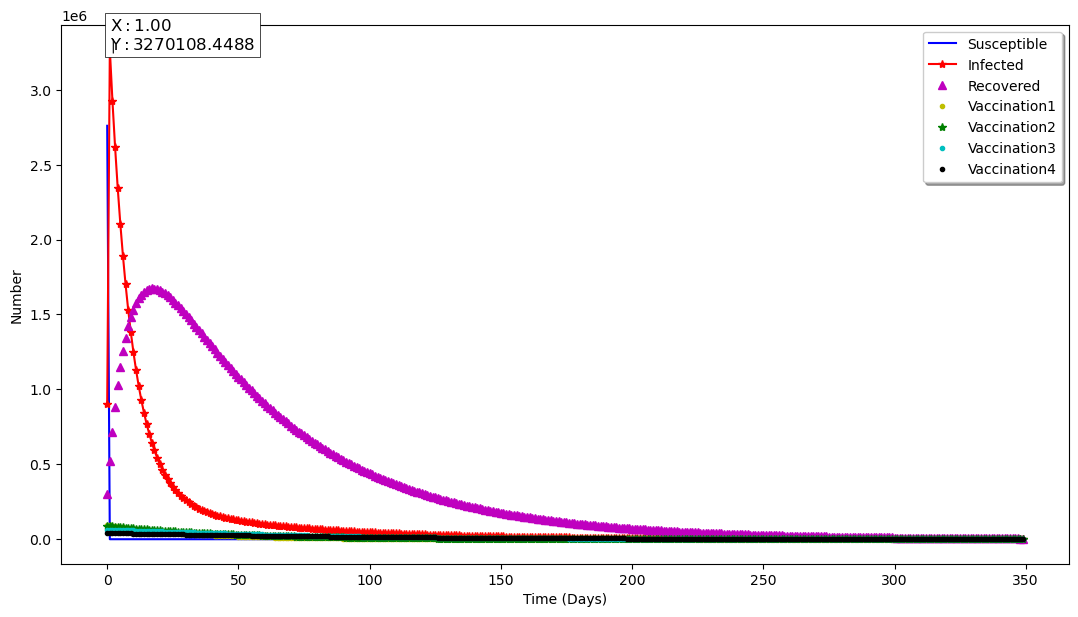

In [31]:
def sir_model(x ,t, Lambda, alpha, beta, mu, gamma, delta, rho1, rho2, rho3, rho4, eta1, eta2, eta3, eta4, epsilon1, epsilon2, epsilon3, epsilon4):
    S, I, R, V1, V2, V3, V4 =x[0], x[1], x[2], x[3], x[4], x[5], x[6]
    
    dSdt = Lambda - alpha * S * I + gamma * R - mu * S - eta1*rho1 * S + V1 * epsilon1 + V2 * epsilon2 + V3 * epsilon3 + V4 * epsilon4
    dIdt = alpha * S * I - (beta + delta + mu) * I
    dRdt = beta * I - (gamma + mu) * R
    dV1dt = eta1*rho1 * S - (epsilon1 + eta2*rho2 + mu) * V1
    dV2dt = eta2*rho2 * V1 - V2 * epsilon2 - eta3*rho3 * V2 - mu * V2
    dV3dt = eta3*rho3 * V2 - V3 * epsilon3 - eta4*rho4 * V3 - mu * V3
    dV4dt = eta4*rho4 * V3 - V4 * epsilon4 - mu * V4
    return [dSdt, dIdt, dRdt, dV1dt, dV2dt, dV3dt, dV4dt]

def vaccine(Lambda, alpha, beta, mu,  gamma, delta, rho1, rho2, rho3, rho4, eta1, eta2, eta3, eta4, epsilon1, epsilon2, epsilon3, epsilon4, out, nT, name):
#   
    N = 4250000
    x0  =[N - 900000 - 300000 - 96245 - 88348 - 64559 - 41625 ,900000, 300000, 96245, 88348, 64559, 41625]
    tt =np.arange(0,nT)
    sirSol =odeint(sir_model, x0, tt, args=(Lambda, alpha, beta, mu, gamma, delta, rho1, rho2, rho3, rho4, eta1, eta2, eta3, eta4, epsilon1, epsilon2, epsilon3, epsilon4))
    sp, ip, rp, v1p, v2p, v3p, v4p =sirSol[:,0:1],sirSol[:,1:2], sirSol[:,2:3], sirSol[:,3:4], sirSol[:,4:5], sirSol[:,5:6], sirSol[:,6:7]
    np.save(out+'S_{}_{}_{}'.format(Lambda, alpha, gamma, mu, rho1, rho2, rho3, rho4, epsilon1, epsilon2, epsilon3, epsilon4, beta, delta, name), ip)
    np.save(out+'R_{}_{}_{}'.format(Lambda, alpha, gamma, mu, rho1, rho2, rho3, rho4, epsilon1, epsilon2, epsilon3, epsilon4, beta, delta, name), rp)
    xmax = tt[np.argmax(ip)]
    ymax = ip.max()
    per_y =ymax/N
    print('Infected Population Percentage %.4f'%(per_y))
    text= '\n'.join((
    r'$\mathrm{X}: %.2f$' % (xmax, ),   
    r'$\mathrm{Y}: %.4f$' % (ymax, )))
    from matplotlib.pylab import rcParams
    rcParams['figure.figsize'] = 13, 7
    plt.plot(1)
    plt.plot(tt, sp, 'b', label='Susceptible')
    plt.plot(tt, ip, '-*r', label='Infected')
    plt.plot(tt, rp, '^m', label="Recovered")
    plt.plot(tt, v1p, '.y', label="Vaccination1")
    plt.plot(tt, v2p, '*g', label="Vaccination2")
    plt.plot(tt, v3p, '.c', label='Vaccination3')
    plt.plot(tt, v4p, '.k', label='Vaccination4')

#     plt.axvline(x=456)
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.50)
    plt.annotate(text, xy=(xmax, ymax), xytext=(xmax, ymax+0.04),bbox=bbox_props, fontsize=12)
    plt.annotate('|', xy=(xmax, ymax))
    plt.xlabel('Time (Days)')
    plt.ylabel('Number')
    plt.legend(
        # ['Susceptible', 'Infected', 'Recovered, Vaccination1, Vaccination2, Vaccination3, Vaccination4'],
        shadow=True, loc='best')
    plt.savefig(out+'vacc_{}_{}.png'.format(name, "H"))
    plt.show()
    return 
vaccine(0.0277,0.086, 0.067841, 0.0154, 0.01, 0.0308, 0.03, 0.02, 0.015, 0.005, 0.3, 0.4, 0.5, 0.8, 0.01, 0.005, 0.0003, 0.0001, out, 350, "tn")

Infected Population Percentage 0.7694


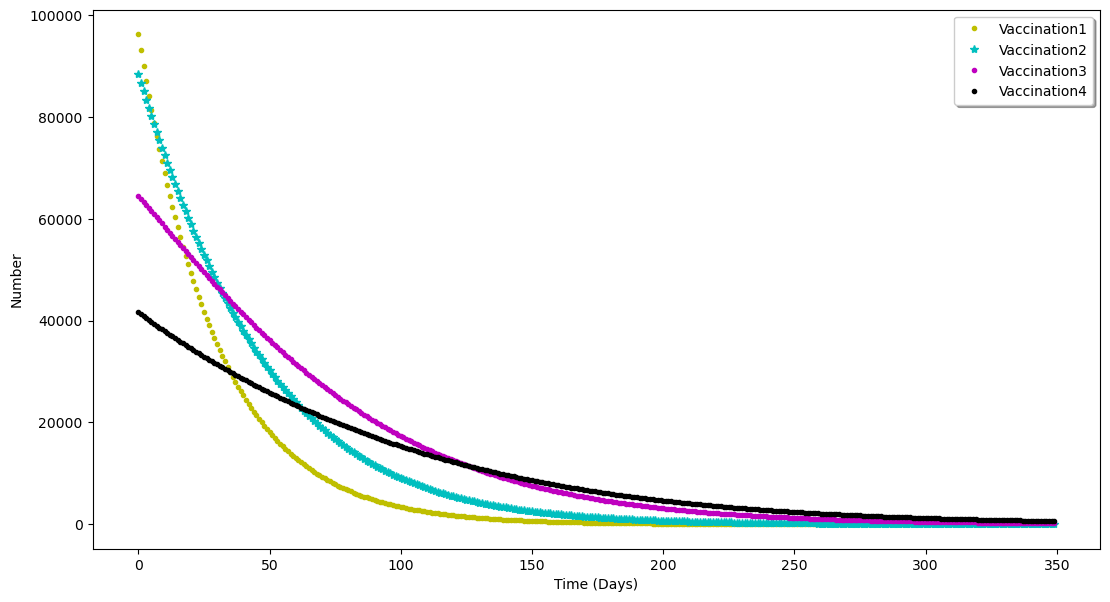

In [32]:
def sir_model(x ,t, Lambda, alpha, beta, mu, gamma, delta, rho1, rho2, rho3, rho4, eta1, eta2, eta3, eta4, epsilon1, epsilon2, epsilon3, epsilon4):
    S, I, R, V1, V2, V3, V4 =x[0], x[1], x[2], x[3], x[4], x[5], x[6]
    
    dSdt = Lambda - alpha * S * I + gamma * R - mu * S - eta1*rho1 * S + V1 * epsilon1 + V2 * epsilon2 + V3 * epsilon3 + V4 * epsilon4
    dIdt = alpha * S * I - (beta + delta + mu) * I
    dRdt = beta * I - (gamma + mu) * R
    dV1dt = eta1*rho1 * S - (epsilon1 + eta2*rho2 + mu) * V1
    dV2dt = eta2*rho2 * V1 - V2 * epsilon2 - eta3*rho3 * V2 - mu * V2
    dV3dt = eta3*rho3 * V2 - V3 * epsilon3 - eta4*rho4 * V3 - mu * V3
    dV4dt = eta4*rho4 * V3 - V4 * epsilon4 - mu * V4
    return [dSdt, dIdt, dRdt, dV1dt, dV2dt, dV3dt, dV4dt]

def vaccine(Lambda, alpha, beta, mu,  gamma, delta, rho1, rho2, rho3, rho4, eta1, eta2, eta3, eta4, epsilon1, epsilon2, epsilon3, epsilon4, out, nT, name):
#   
    N = 4250000
    x0  =[N - 900000 - 300000 - 96245 - 88348 - 64559 - 41625 ,900000, 300000, 96245, 88348, 64559, 41625]
    tt =np.arange(0,nT)
    sirSol =odeint(sir_model, x0, tt, args=(Lambda, alpha, beta, mu, gamma, delta, rho1, rho2, rho3, rho4, eta1, eta2, eta3, eta4, epsilon1, epsilon2, epsilon3, epsilon4))
    sp, ip, rp, v1p, v2p, v3p, v4p =sirSol[:,0:1],sirSol[:,1:2], sirSol[:,2:3], sirSol[:,3:4], sirSol[:,4:5], sirSol[:,5:6], sirSol[:,6:7]
    np.save(out+'S_{}_{}_{}'.format(Lambda, alpha, gamma, mu, rho1, rho2, rho3, rho4, epsilon1, epsilon2, epsilon3, epsilon4, beta, delta, name), ip)
    np.save(out+'R_{}_{}_{}'.format(Lambda, alpha, gamma, mu, rho1, rho2, rho3, rho4, epsilon1, epsilon2, epsilon3, epsilon4, beta, delta, name), rp)
    xmax = tt[np.argmax(ip)]
    ymax = ip.max()
    per_y =ymax/N
    print('Infected Population Percentage %.4f'%(per_y))
    text= '\n'.join((
    r'$\mathrm{X}: %.2f$' % (xmax, ),   
    r'$\mathrm{Y}: %.4f$' % (ymax, )))
    from matplotlib.pylab import rcParams
    rcParams['figure.figsize'] = 13, 7
    plt.plot(1)
    # plt.plot(tt, sp, 'b', label='Susceptible')
    # plt.plot(tt, ip, '-*r', label='Infected')
    # plt.plot(tt, rp, '^m', label="Recovered")
    plt.plot(tt, v1p, '.y', label="Vaccination1")
    plt.plot(tt, v2p, '*c', label="Vaccination2")
    plt.plot(tt, v3p, '.m', label='Vaccination3')
    plt.plot(tt, v4p, '.k', label='Vaccination4')

#     plt.axvline(x=456)
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.50)
    # plt.annotate(text, xy=(xmax, ymax), xytext=(xmax, ymax+0.04),bbox=bbox_props, fontsize=12)
    # plt.annotate('|', xy=(xmax, ymax))
    plt.xlabel('Time (Days)')
    plt.ylabel('Number')
    plt.legend(
        # ['Susceptible', 'Infected', 'Recovered, Vaccination1, Vaccination2, Vaccination3, Vaccination4'],
        shadow=True, loc='best')
    plt.savefig(out+'vacc_{}_{}.png'.format(name, "H"))
    plt.show()
    return 
vaccine(0.0277,0.086, 0.067841, 0.0154, 0.01, 0.0308, 0.03, 0.02, 0.015, 0.005, 0.3, 0.4, 0.5, 0.8, 0.01, 0.005, 0.0003, 0.0001, out, 350, "tn")

## Model with constant Vaccination rate, $\rho_i$=0.7% with different efficacy rates

<!-- ### New York City -->

Infected Population Percentage 0.7694


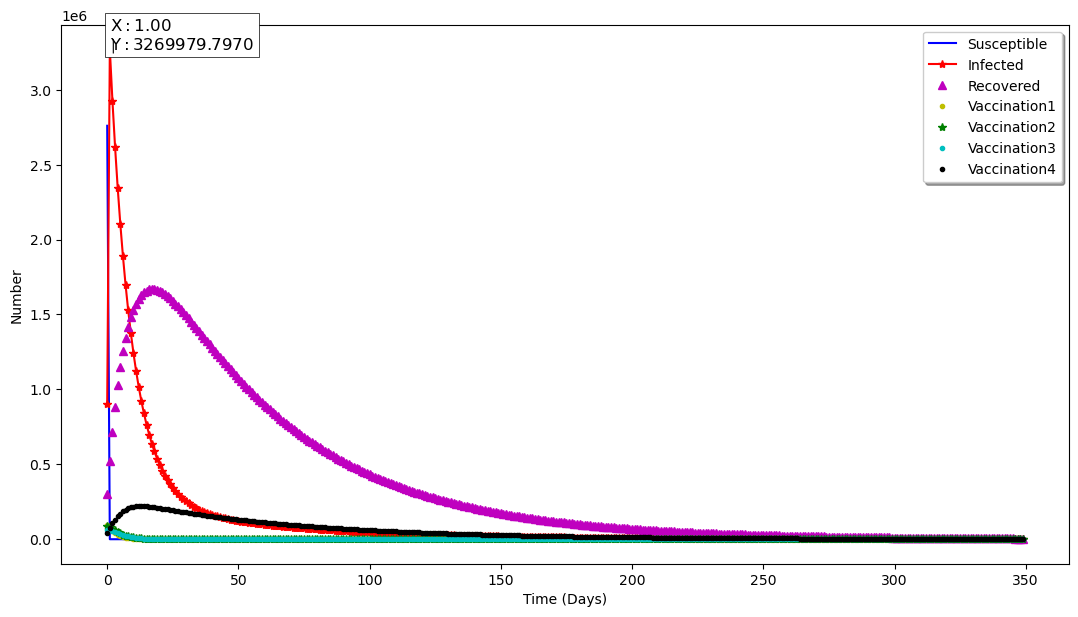

In [34]:
def sir_model(x ,t, Lambda, alpha, beta, mu, gamma, delta, rho1, rho2, rho3, rho4, eta1, eta2, eta3, eta4, epsilon1, epsilon2, epsilon3, epsilon4):
    S, I, R, V1, V2, V3, V4 =x[0], x[1], x[2], x[3], x[4], x[5], x[6]
    dSdt = Lambda - alpha * S * I + gamma * R - mu * S - eta1*rho1 * S + V1 * epsilon1 + V2 * epsilon2 + V3 * epsilon3 + V4 * epsilon4
    dIdt = alpha * S * I - (beta + delta + mu) * I
    dRdt = beta * I - (gamma + mu) * R
    dV1dt = eta1*rho1 * S - (epsilon1 + eta2*rho2 + mu) * V1
    dV2dt = eta2*rho2 * V1 - V2 * epsilon2 - eta3*rho3 * V2 - mu * V2
    dV3dt = eta3*rho3 * V2 - V3 * epsilon3 - eta4*rho4 * V3 - mu * V3
    dV4dt = eta4*rho4 * V3 - V4 * epsilon4 - mu * V4
    return [dSdt, dIdt, dRdt, dV1dt, dV2dt, dV3dt, dV4dt]

def vaccine(Lambda, alpha, beta, mu, gamma, delta, rho1, rho2, rho3, rho4, eta1, eta2, eta3, eta4, epsilon1, epsilon2, epsilon3, epsilon4, out, nT, name):
#   
    N = 4250000
    x0  =[N - 900000 - 300000 - 88348 - 96245 - 64559 - 41625 ,900000, 300000, 96245, 88348, 64559, 41625]
    tt =np.arange(0,nT)
    sirSol =odeint(sir_model, x0, tt, args=(Lambda, alpha, beta, mu, gamma, delta, rho1, rho2, rho3, rho4, eta1, eta2, eta3, eta4, epsilon1, epsilon2, epsilon3, epsilon4))
    sp, ip, rp, v1p, v2p, v3p, v4p =sirSol[:,0:1],sirSol[:,1:2], sirSol[:,2:3], sirSol[:,3:4], sirSol[:,4:5], sirSol[:,5:6], sirSol[:,6:7]
    np.save(out+'S_{}_{}_{}'.format(Lambda, alpha, beta, mu, gamma, delta, rho1, rho2, rho3, rho4, eta1, eta2, eta3, eta4, epsilon1, epsilon2, epsilon3, epsilon4, name), ip)
    np.save(out+'R_{}_{}_{}'.format(Lambda, alpha, beta, mu, gamma, delta, rho1, rho2, rho3, rho4, eta1, eta2, eta3, eta4, epsilon1, epsilon2, epsilon3, epsilon4, name), rp)
    xmax = tt[np.argmax(ip)]
    ymax = ip.max()
    per_y =ymax/N
    print('Infected Population Percentage %.4f'%(per_y))
    text= '\n'.join((
    r'$\mathrm{X}: %.2f$' % (xmax, ),   
    r'$\mathrm{Y}: %.4f$' % (ymax, )))
    from matplotlib.pylab import rcParams
    rcParams['figure.figsize'] = 13, 7
    plt.plot(tt, sp, 'b', label='Susceptible')
    plt.plot(tt, ip, '-*r', label='Infected')
    plt.plot(tt, rp, '^m', label="Recovered")
    plt.plot(tt, v1p, '.y', label="Vaccination1")
    plt.plot(tt, v2p, '*g', label="Vaccination2")
    plt.plot(tt, v3p, '.c', label='Vaccination3')
    plt.plot(tt, v4p, '.k', label='Vaccination4')

#     plt.axvline(x=456)
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.50)
    plt.annotate(text, xy=(xmax, ymax), xytext=(xmax, ymax), bbox=bbox_props, fontsize=12)
    plt.annotate('|', xy=(xmax, ymax))
    plt.xlabel('Time (Days)')
    plt.ylabel('Number')
    plt.legend(
        # ['Susceptible', 'Infected', 'Recovered, Vaccination1, Vaccination2, Vaccination3, Vaccination4'],
        shadow=True, loc='best')
    plt.savefig(out+'vacc_{}_{}.png'.format(name, "H"))
    plt.show()
    return 
vaccine(0.0277,0.086, 0.067841, 0.0154, 0.01, 0.0308, 0.7, 0.7, 0.7, 0.7, 0.3, 0.4, 0.5, 0.8, 0.01, 0.005, 0.0003, 0.0001, out, 350, "tn")

Infected Population Percentage 0.3497


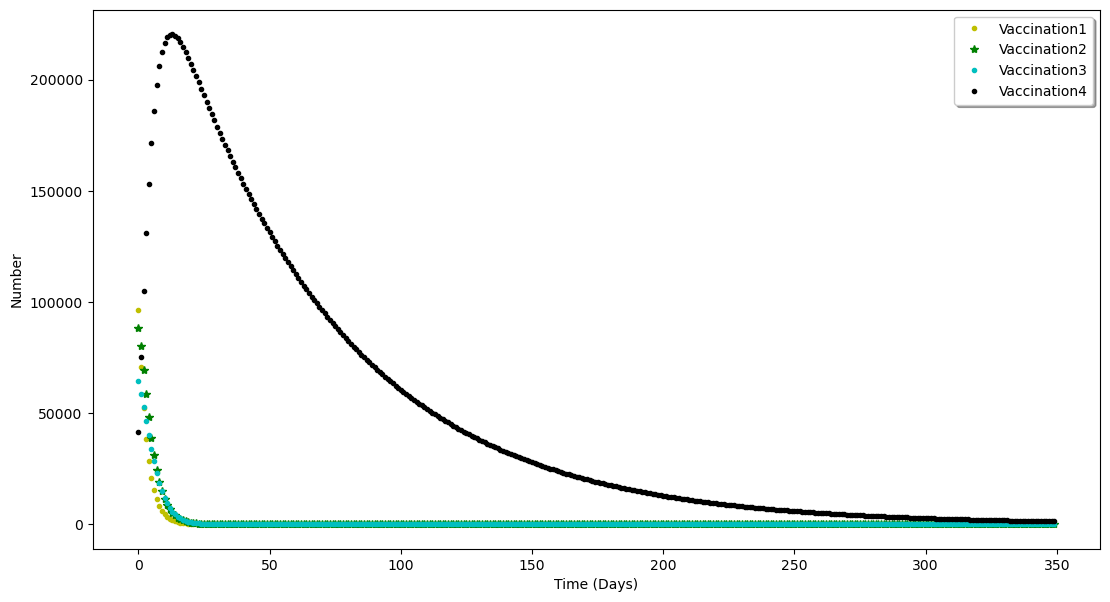

In [35]:
def sir_model(x ,t, Lambda, alpha, beta, mu, gamma, delta, rho1, rho2, rho3, rho4, eta1, eta2, eta3, eta4, epsilon1, epsilon2, epsilon3, epsilon4):
    S, I, R, V1, V2, V3, V4 =x[0], x[1], x[2], x[3], x[4], x[5], x[6]
    dSdt = Lambda - alpha * S * I + gamma * R - mu * S - eta1*rho1 * S + V1 * epsilon1 + V2 * epsilon2 + V3 * epsilon3 + V4 * epsilon4
    dIdt = alpha * S * I - (beta + delta + mu) * I
    dRdt = beta * I - (gamma + mu) * R
    dV1dt = eta1*rho1 * S - (epsilon1 + eta2*rho2 + mu) * V1
    dV2dt = eta2*rho2 * V1 - V2 * epsilon2 - eta3*rho3 * V2 - mu * V2
    dV3dt = eta3*rho3 * V2 - V3 * epsilon3 - eta4*rho4 * V3 - mu * V3
    dV4dt = eta4*rho4 * V3 - V4 * epsilon4 - mu * V4
    return [dSdt, dIdt, dRdt, dV1dt, dV2dt, dV3dt, dV4dt]

def vaccine(Lambda, alpha, beta, mu, gamma, delta, rho1, rho2, rho3, rho4, eta1, eta2, eta3, eta4, epsilon1, epsilon2, epsilon3, epsilon4, out, nT, name):
#   
    N = 4250000
    x0  =[N - 900000 - 300000 - 88348 - 96245 - 64559 - 41625 ,900000, 30000, 96245, 88348, 64559, 41625]
    tt =np.arange(0,nT)
    sirSol =odeint(sir_model, x0, tt, args=(Lambda, alpha, beta, mu, gamma, delta, rho1, rho2, rho3, rho4, eta1, eta2, eta3, eta4, epsilon1, epsilon2, epsilon3, epsilon4))
    sp, ip, rp, v1p, v2p, v3p, v4p =sirSol[:,0:1],sirSol[:,1:2], sirSol[:,2:3], sirSol[:,3:4], sirSol[:,4:5], sirSol[:,5:6], sirSol[:,6:7]
    np.save(out+'S_{}_{}_{}'.format(Lambda, alpha, beta, mu, gamma, delta, rho1, rho2, rho3, rho4, eta1, eta2, eta3, eta4, epsilon1, epsilon2, epsilon3, epsilon4, name), ip)
    np.save(out+'R_{}_{}_{}'.format(Lambda, alpha, beta, mu, gamma, delta, rho1, rho2, rho3, rho4, eta1, eta2, eta3, eta4, epsilon1, epsilon2, epsilon3, epsilon4, name), rp)
    xmax = tt[np.argmax(ip)]
    ymax = rp.max()
    per_y =ymax/N
    print('Infected Population Percentage %.4f'%(per_y))
    text= '\n'.join((
    r'$\mathrm{X}: %.2f$' % (xmax, ),   
    r'$\mathrm{Y}: %.4f$' % (ymax, )))
    from matplotlib.pylab import rcParams
    rcParams['figure.figsize'] = 13, 7
    # plt.plot(tt, sp, 'b', label='Susceptible')
    # plt.plot(tt, ip, '-*r', label='Infected')
    # plt.plot(tt, rp, '^m', label="Recovered")
    plt.plot(tt, v1p, '.y', label="Vaccination1")
    plt.plot(tt, v2p, '*g', label="Vaccination2")
    plt.plot(tt, v3p, '.c', label='Vaccination3')
    plt.plot(tt, v4p, '.k', label='Vaccination4')

#     plt.axvline(x=456)
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.50)
    plt.annotate(text, xy=(xmax, ymax), xytext=(xmax, ymax), bbox=bbox_props, fontsize=12)
    plt.annotate('|', xy=(xmax, ymax))
    plt.xlabel('Time (Days)')
    plt.ylabel('Number')
    plt.legend(
        # ['Susceptible', 'Infected', 'Recovered, Vaccination1, Vaccination2, Vaccination3, Vaccination4'],
        shadow=True, loc='best')
    plt.savefig(out+'vacc_{}_{}.png'.format(name, "H"))
    plt.show()
    return 
vaccine(0.0277,0.086, 0.067841, 0.0154, 0.01, 0.0308, 0.7, 0.7, 0.7, 0.7, 0.3, 0.4, 0.5, 0.8, 0.01, 0.005, 0.0003, 0.0001, out, 350, "tn")

## Model without Vaccination

Infected Population Percent 0.8292


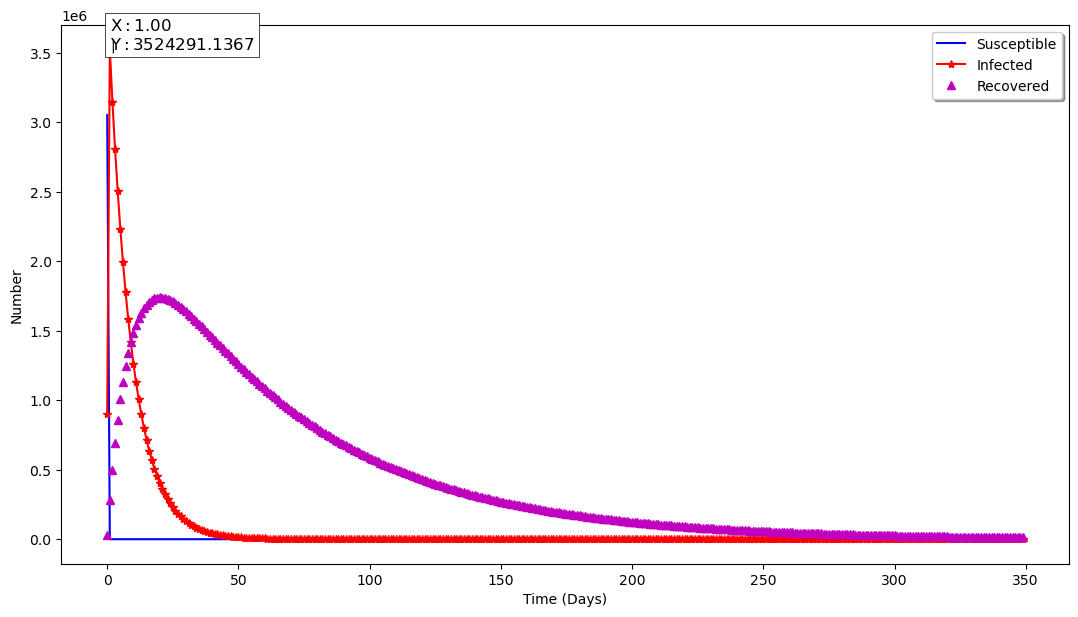

In [36]:
def sir_model(x ,t, Lambda, alpha, beta, mu, gamma, delta, rho1, rho2, rho3, rho4, eta1, eta2, eta3, eta4, epsilon1, epsilon2, epsilon3, epsilon4):
    S, I, R, V1, V2, V3, V4 =x[0], x[1], x[2], x[3], x[4], x[5], x[6]
    dSdt = Lambda - alpha * S * I + gamma * R - mu * S - eta1*rho1 * S + V1 * epsilon1 + V2 * epsilon2 + V3 * epsilon3 + V4 * epsilon4
    dIdt = alpha * S * I - (beta + delta + mu) * I
    dRdt = beta * I - (gamma + mu) * R
    dV1dt = eta1*rho1 * S - (epsilon1 + eta2*rho2 + mu) * V1
    dV2dt = eta2*rho2 * V1 - V2 * epsilon2 - eta3*rho3 * V2 - mu * V2
    dV3dt = eta3*rho3 * V2 - V3 * epsilon3 - eta4*rho4 * V3 - mu * V3
    dV4dt = eta4*rho4 * V3 - V4 * epsilon4 - mu * V4
    return [dSdt, dIdt, dRdt, dV1dt, dV2dt, dV3dt, dV4dt]

def vaccine(Lambda, alpha, beta, mu, gamma, delta, rho1, rho2, rho3, rho4, eta1, eta2, eta3, eta4, epsilon1, epsilon2, epsilon3, epsilon4, out, nT, name):
#     
    N = 4250000
    x0  =[N - 900000 - 300000 - 0 - 0 - 0 - 0 ,900000, 30000, 0, 0, 0, 0]
    tt =np.arange(0,nT)
    sirSol =odeint(sir_model, x0, tt, args=(Lambda, alpha, beta, mu, gamma, delta, rho1, rho2, rho3, rho4, eta1, eta2, eta3, eta4, epsilon1, epsilon2, epsilon3, epsilon4))
    sp, ip, rp, v1p, v2p, v3p, v4p =sirSol[:,0:1],sirSol[:,1:2], sirSol[:,2:3], sirSol[:,3:4], sirSol[:,4:5], sirSol[:,5:6], sirSol[:,6:7]
    np.save(out+'S_{}_{}_{}'.format(Lambda, alpha, beta, mu, gamma, delta, rho1, rho2, rho3, rho4, eta1, eta2, eta3, eta4, epsilon1, epsilon2, epsilon3, epsilon4, name), ip)
    np.save(out+'R_{}_{}_{}'.format(Lambda, alpha, beta, mu, gamma, delta, rho1, rho2, rho3, rho4, eta1, eta2, eta3, eta4, epsilon1, epsilon2, epsilon3, epsilon4, name), rp)
    xmax = tt[np.argmax(ip)]
    ymax = ip.max()
    per_y =ymax/N
    print('Infected Population Percent %.4f'%(per_y))
    text= '\n'.join((
    r'$\mathrm{X}: %.2f$' % (xmax, ),   
    r'$\mathrm{Y}: %.4f$' % (ymax, )))
    from matplotlib.pylab import rcParams
    rcParams['figure.figsize'] = 13, 7
    plt.plot(tt, sp, 'b', label='Susceptible')
    plt.plot(tt, ip, '-r*', label='Infected')
    plt.plot(tt, rp, '^m', label="Recovered")
    # plt.plot(tt, v1p, '.y', label="Vaccination1")
    # plt.plot(tt, v2p, '*g', label="Vaccination2")
    # plt.plot(tt, v3p, '.c', label='Vaccination3')
    # plt.plot(tt, v4p, '.k', label='Vaccination4')

#     plt.axvline(x=456)
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.50)
    plt.annotate(text, xy=(xmax, ymax), xytext=(xmax, ymax+0.04),bbox=bbox_props, fontsize=12)
    plt.annotate('|', xy=(xmax, ymax))
    plt.xlabel('Time (Days)')
    plt.ylabel('Number')
    plt.legend(
        # ['Susceptible', 'Infected', 'Recovered, Vaccination1, Vaccination2, Vaccination3, Vaccination4'],
        shadow=True, loc='best')
    plt.savefig(out+'vacc_{}_{}.png'.format(name, "H"))
    plt.show()
    return 
vaccine(0.0277,0.086, 0.067841, 0.0154, 0.0001, 0.0308, 0, 0,0, 0, 0, 0, 0, 0,0,0,0, 0, out, 350, "tn")

## Model with different alpha and beta

In [38]:
def model_with_vacc(data, epochs, al, bi, name, rho1, rho2, rho3, rho4):
    global xd1
    # Rescale and prepare data for the model
    scaler1 = MinMaxScaler()
    yd1 = scaler1.fit_transform(data[:, 1:])  # Assuming data is a 2D array with time as the first column
    xd1 = data[:, 0].reshape(-1, 1)  # Time vector

    # Ensure xd1 is monotonically increasing and remove duplicates
    xd1, unique_indices = np.unique(xd1, return_index=True)
    yd1 = yd1[unique_indices]
    
    if __name__ == "__main__":
        alpha_arr = []
        beta_arr = []
        N = 1.0
        
        # Initial conditions as scalars
        i0 = float(yd1[0, 1])
        r0 = float(yd1[0, 1])
        v10, v20, v30, v40 = float(yd1[0, 1]), float(yd1[0, 1]), float(yd1[0, 1]), float(yd1[0, 1])
        s0 = N - i0 - r0 - v10 - v20 - v30 - v40
        U0 = [s0, i0, r0, v10, v20, v30, v40]  # Convert all to scalar if needed
        
        for k in range(len(bi)):
            print(f'Modeling when alpha={al[k]} and beta={bi[k]}')
            Lambda, alpha, beta, mu, gamma, delta, eta1, eta2, eta3, eta4, epsilon1, epsilon2, epsilon3, epsilon4 = 0.0277, al[k], bi[k], 0.0154, 0.01, 0.0308, 0.3, 0.4, 0.5, 0.8, 0.01, 0.005, 0.0003, 0.0001
            
            sirSol = odeint(sir_model, U0, xd1.flatten(), args=(Lambda, alpha, beta, mu, gamma, delta, rho1, rho2, rho3, rho4, eta1, eta2, eta3, eta4, epsilon1, epsilon2, epsilon3, epsilon4))
            s2, i2, r2, v12, v22, v32, v42 = sirSol[:, [0]], sirSol[:, [1]], sirSol[:, [2]], sirSol[:, [3]], sirSol[:, [4]], sirSol[:, [5]], sirSol[:, [6]]

            print(s2.shape)
            sc_out = scaler1.inverse_transform(np.hstack((s2, i2, r2, v12, v22, v32, v42)))
            S, I, R, V1, V2, V3, V4 = sc_out[:, [0]], sc_out[:, [1]], sc_out[:, [2]], sc_out[:, [3]], sc_out[:, [4]], sc_out[:, [5]], sc_out[:, [6]]
            # S, I, R, V1, V2, V3, V4 = scaler1.inverse_transform(np.hstack((s2, i2, r2, v12, v22, v32, v42)))
            # S = scaler1.inverse_transform(s2.reshape(-1, 1)).flatten()
            # I = scaler1.inverse_transform(i2.reshape(-1, 1)).flatten()
            # R = scaler1.inverse_transform(r2.reshape(-1, 1)).flatten()
            # V1 = scaler1.inverse_transform(v12.reshape(-1, 1)).flatten()
            # V2 = scaler1.inverse_transform(v22.reshape(-1, 1)).flatten()
            # V3 = scaler1.inverse_transform(v32.reshape(-1, 1)).flatten()
            # V4 = scaler1.inverse_transform(v42.reshape(-1, 1)).flatten()
            
            alpha_arr.append(alpha)
            beta_arr.append(beta)
            R0 = (alpha * (Lambda + V1 * epsilon1 + V2 * epsilon2 + V3 * epsilon3 + V4 * epsilon4)) / ((beta + delta + mu) * (mu + rho1))
            
            alpha_abs = np.linalg.norm(0.5 - alpha)
            alpha_rel = np.linalg.norm(0.5 - alpha) / np.linalg.norm(0.5)
            beta_abs = np.linalg.norm(1/7 - beta)
            beta_rel = np.linalg.norm(1/7 - beta) / np.linalg.norm(1/7)
            
            print(f'####### {name} with Vaccination ####')
            print(f'Absolute Error in alpha: {alpha_abs} and Relative Error in alpha: {alpha_rel}')
            print(f'Absolute Error in beta: {beta_abs} and Relative Error in beta: {beta_rel}')
            print('alpha:',alpha,',', 'Beta:',beta, 'and', 'R0:', R0)

        return np.array(alpha_arr), np.array(beta_arr)

# Example usage:
# Ensure tndata is your data array where the first column is time and the remaining columns are the other variables.
tndata = np.random.rand(300, 8)  # Dummy data, replace with actual data
al = [0.12, 0.1, 0.02, -0.03, 0.05, 0.05]  # Initial beta values for different vaccination rates
bi = [1.5, 1.52, 1.52, 1.55, 1.5, 1.48]   # Initial gamma values for different vaccination rates
epochs = [800, 800, 800, 800, 800, 800]   # Set epochs for training
bb, gg = model_with_vacc(tndata, epochs, al, bi, "Entire State", 0.17, 0.09, 0.06, 0.03)

Modeling when alpha=0.12 and beta=1.5
(300, 1)
####### Entire State with Vaccination ####
Absolute Error in alpha: 0.38 and Relative Error in alpha: 0.76
Absolute Error in beta: 1.3571428571428572 and Relative Error in beta: 9.500000000000002
alpha: 0.12 , Beta: 1.5 and R0: [[0.01483665]
 [0.01483637]
 [0.01483631]
 [0.0148354 ]
 [0.01483284]
 [0.01483068]
 [0.01482473]
 [0.01482208]
 [0.0148214 ]
 [0.01482029]
 [0.01481957]
 [0.01481597]
 [0.014815  ]
 [0.01481385]
 [0.01481223]
 [0.01481196]
 [0.01480807]
 [0.01480578]
 [0.01480511]
 [0.01480437]
 [0.01480378]
 [0.01480375]
 [0.01480295]
 [0.01480038]
 [0.01479923]
 [0.01479885]
 [0.01479876]
 [0.01479807]
 [0.01479761]
 [0.01479726]
 [0.01479612]
 [0.01479039]
 [0.01479003]
 [0.0147897 ]
 [0.01478872]
 [0.01478806]
 [0.01478505]
 [0.01478332]
 [0.01478269]
 [0.01477997]
 [0.01477932]
 [0.01477327]
 [0.01477212]
 [0.01476576]
 [0.01476312]
 [0.01476207]
 [0.01476137]
 [0.01476029]
 [0.01476006]
 [0.01475982]
 [0.01475462]
 [0.0147520

## Model with Vaccination when $\eta=90\%$

In [39]:
def model_with_vacc(data, epochs, al, bi, name, rho1, rho2, rho3, rho4):
    global xd1
    # Rescale and prepare data for the model
    scaler1 = MinMaxScaler()
    yd1 = scaler1.fit_transform(data[:, 1:])  # Assuming data is a 2D array with time as the first column
    xd1 = data[:, 0].reshape(-1, 1)  # Time vector

    # Ensure xd1 is monotonically increasing and remove duplicates
    xd1, unique_indices = np.unique(xd1, return_index=True)
    yd1 = yd1[unique_indices]
    
    if __name__ == "__main__":
        alpha_arr = []
        beta_arr = []
        N = 1.0
        
        # Initial conditions as scalars
        i0 = float(yd1[0, 1])
        r0 = float(yd1[0, 1])
        v10, v20, v30, v40 = float(yd1[0, 1]), float(yd1[0, 1]), float(yd1[0, 1]), float(yd1[0, 1])
        s0 = N - i0 - r0 - v10 - v20 - v30 - v40
        U0 = [s0, i0, r0, v10, v20, v30, v40]  # Convert all to scalar if needed
        
        for k in range(len(bi)):
            print(f'Modeling when alpha={al[k]} and beta={bi[k]}')
            Lambda, alpha, beta, mu, gamma, delta, eta1, eta2, eta3, eta4, epsilon1, epsilon2, epsilon3, epsilon4 = 0.0277, al[k], bi[k], 0.0154, 0.01, 0.0308, 0.94, 0.94, 0.94, 0.94, 0.01, 0.005, 0.0003, 0.0001
            
            sirSol = odeint(sir_model, U0, xd1.flatten(), args=(Lambda, alpha, beta, mu, gamma, delta, rho1, rho2, rho3, rho4, eta1, eta2, eta3, eta4, epsilon1, epsilon2, epsilon3, epsilon4))
            s2, i2, r2, v12, v22, v32, v42 = sirSol[:, [0]], sirSol[:, [1]], sirSol[:, [2]], sirSol[:, [3]], sirSol[:, [4]], sirSol[:, [5]], sirSol[:, [6]]

            print(s2.shape)
            sc_out = scaler1.inverse_transform(np.hstack((s2, i2, r2, v12, v22, v32, v42)))
            S, I, R, V1, V2, V3, V4 = sc_out[:, [0]], sc_out[:, [1]], sc_out[:, [2]], sc_out[:, [3]], sc_out[:, [4]], sc_out[:, [5]], sc_out[:, [6]]
            # S, I, R, V1, V2, V3, V4 = scaler1.inverse_transform(np.hstack((s2, i2, r2, v12, v22, v32, v42)))
            # S = scaler1.inverse_transform(s2.reshape(-1, 1)).flatten()
            # I = scaler1.inverse_transform(i2.reshape(-1, 1)).flatten()
            # R = scaler1.inverse_transform(r2.reshape(-1, 1)).flatten()
            # V1 = scaler1.inverse_transform(v12.reshape(-1, 1)).flatten()
            # V2 = scaler1.inverse_transform(v22.reshape(-1, 1)).flatten()
            # V3 = scaler1.inverse_transform(v32.reshape(-1, 1)).flatten()
            # V4 = scaler1.inverse_transform(v42.reshape(-1, 1)).flatten()
            
            alpha_arr.append(alpha)
            beta_arr.append(beta)
            R0 = (alpha * (Lambda + V1 * epsilon1 + V2 * epsilon2 + V3 * epsilon3 + V4 * epsilon4)) / ((beta + delta + mu) * (mu + rho1))
            
            alpha_abs = np.linalg.norm(0.5 - alpha)
            alpha_rel = np.linalg.norm(0.5 - alpha) / np.linalg.norm(0.5)
            beta_abs = np.linalg.norm(1/7 - beta)
            beta_rel = np.linalg.norm(1/7 - beta) / np.linalg.norm(1/7)
            
            print(f'####### {name} with Vaccination ####')
            print(f'Absolute Error in alpha: {alpha_abs} and Relative Error in alpha: {alpha_rel}')
            print(f'Absolute Error in beta: {beta_abs} and Relative Error in beta: {beta_rel}')
            print('alpha:',alpha,',', 'Beta:',beta, 'and', 'R0:', R0)

        return np.array(alpha_arr), np.array(beta_arr)

# Example usage:
# Ensure tndata is your data array where the first column is time and the remaining columns are the other variables.
tndata = np.random.rand(300, 8)  # Dummy data, replace with actual data
al = [0.03, 0.1, 0.02, -0.03, 0.05, 0.05]  # Initial beta values for different vaccination rates
bi = [1.55, 1.52, 1.52, 1.55, 1.5, 1.48]   # Initial gamma values for different vaccination rates
epochs = [800, 800, 800, 800, 800, 800]   # Set epochs for training
bb, gg = model_with_vacc(tndata, epochs, al, bi, "Entire State", 0.9, 0.9, 0.9, 0.9)

Modeling when alpha=0.03 and beta=1.55
(300, 1)
####### Entire State with Vaccination ####
Absolute Error in alpha: 0.47 and Relative Error in alpha: 0.94
Absolute Error in beta: 1.4071428571428573 and Relative Error in beta: 9.850000000000001
alpha: 0.03 , Beta: 1.55 and R0: [[0.0008687 ]
 [0.00086762]
 [0.00086105]
 [0.00086081]
 [0.00085881]
 [0.00085095]
 [0.00085022]
 [0.00085022]
 [0.00084951]
 [0.0008447 ]
 [0.00084218]
 [0.00084194]
 [0.00083883]
 [0.00083738]
 [0.00083561]
 [0.00083442]
 [0.00082777]
 [0.000821  ]
 [0.00081909]
 [0.000818  ]
 [0.0008166 ]
 [0.00081329]
 [0.0008099 ]
 [0.00080812]
 [0.00080737]
 [0.0008011 ]
 [0.00079755]
 [0.00079683]
 [0.00079673]
 [0.00079365]
 [0.00079343]
 [0.00078733]
 [0.00078524]
 [0.00078516]
 [0.00078488]
 [0.00078251]
 [0.00077916]
 [0.00077629]
 [0.0007719 ]
 [0.00077172]
 [0.00076911]
 [0.00076863]
 [0.0007663 ]
 [0.00076555]
 [0.00076122]
 [0.00075607]
 [0.00075355]
 [0.00075145]
 [0.00075101]
 [0.00075022]
 [0.00074486]
 [0.00074

<!-- #### Vaccination Model for UK -->

## SIRV Model

In [40]:
def sirv_model(x ,t, Lambda, alpha,  beta, mu, gamma, delta,  rho1, rho2, rho3, rho4, eta1, eta2, eta3, eta4, epsilon1, epsilon2, epsilon3, epsilon4):
    S, I, R, V1, V2, V3, V4 =x[0], x[1], x[2], x[3], x[4], x[5], x[6]
    dSdt = Lambda - alpha * S * I + gamma * R - mu * S - eta1*rho1 * S + V1 * epsilon1 + V2 * epsilon2 + V3 * epsilon3 + V4 * epsilon4
    dIdt = alpha * S * I - (beta + delta + mu) * I
    dRdt = beta * I - (gamma + mu) * R
    dV1dt = eta1*rho1 * S - (epsilon1 + eta2*rho2 + mu) * V1
    dV2dt = eta2*rho2 * V1 - V2 * epsilon2 - eta3*rho3 * V2 - mu * V2
    dV3dt = eta3*rho3 * V2 - V3 * epsilon3 - eta4*rho4 * V3 - mu * V3
    dV4dt = eta4*rho4 * V3 - V4 * epsilon4 - mu * V4
    return [dSdt, dIdt, dRdt, dV1dt, dV2dt, dV3dt, dV4dt]

def vaccine(alpha,beta, rho1, rho2, rho3, rho4, out = "C:\\Users\\iboad/Results/", nT = 300, name = "tn", eta1=0.5, eta2=0.7, eta3=0.85, eta4=0.94, epsilon1= 0.01, epsilon2= 0.005,epsilon3= 0.0003, epsilon4=0.0001, mu= 0.03, gamma= 0.4, delta=0.0508, Lambda =0.0477):
#     
    # x0  =[0.873*N,0.065*N, 0.062*N]
    N = 4250000
    x0  =[N - 90000 - 30000 - 88348 - 96245 - 64559 - 41625 ,90000, 30000, 88348, 96245, 64559, 41625]
    tt =np.arange(0,nT)
    sirSol =odeint(sir_model, x0, tt, args=(Lambda, alpha, beta, mu, gamma, delta, rho1, rho2, rho3, rho4, eta1, eta2, eta3, eta4, epsilon1, epsilon2, epsilon3, epsilon4))
    sp, ip, rp, v1p, v2p, v3p, v4p =sirSol[:,0:1],sirSol[:,1:2], sirSol[:,2:3], sirSol[:,3:4], sirSol[:,4:5], sirSol[:,5:6], sirSol[:,6:7]
    np.save(out+'S_{}_{}_{}'.format(rho1, rho2, rho3, rho4, name), sp)
    np.save(out+'I_{}_{}_{}'.format(rho1, rho2, rho3, rho4, name), ip)
    np.save(out+'R_{}_{}_{}'.format(rho1, rho2, rho3, rho4, name), rp)
    np.save(out+'V1_{}_{}_{}'.format(rho1, rho2, rho3, rho4, name), v1p)
    np.save(out+'V2_{}_{}_{}'.format(rho1, rho2, rho3, rho4, name), v2p)
    np.save(out+'V3_{}_{}_{}'.format(rho1, rho2, rho3, rho4, name), v3p)
    np.save(out+'V4_{}_{}_{}'.format(rho1, rho2, rho3, rho4, name), v4p)
    xmax = tt[np.argmax(ip)]
    ymax = ip.max()
    per_y =ymax/N
    print('Infected Population Percent %.4f'%(per_y))
    text= '\n'.join((
    r'$\mathrm{X}: %.2f$' % (xmax, ),   
    r'$\mathrm{Y}: %.4f$' % (ymax, )))
    from matplotlib.pylab import rcParams
    rcParams['figure.figsize'] =6,6
    plt.plot(tt, sp, 'r', label='Susceptible')
    plt.plot(tt, ip, '-*b', label='Infected')
    plt.plot(tt, rp, '^m', label="Recovered")
    plt.plot(tt, v1p, '.y', label="Vaccination1")
    plt.plot(tt, v2p, '*y', label="Vaccination2")
    plt.plot(tt, v3p, '.c', label='Vaccination3')
    plt.plot(tt, v4p, '.k', label='Vaccination4')

#     plt.axvline(x=456)
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.50)
    plt.annotate(text, xy=(xmax, ymax), xytext=(xmax, ymax+0.04),bbox=bbox_props, fontsize=12)
    plt.annotate('|', xy=(xmax, ymax))
    plt.xlabel('Time (Days)')
    plt.ylabel('S(t), I(t), R(t), V1(t), V2(t), V3(t), V4(t)')
    plt.legend(['Susceptible', 'Infected', 'Recovered', 'Vaccination1', 'Vaccination2', 'Vaccination3', 'Vaccination4' ], shadow=True, loc='best')
    plt.savefig(out+'vacc_{}_{}_{}.png'.format(name,rho1, rho2, rho3, rho4))
    plt.show()
    return 



## Plots for different $\eta$

Infected Population Percent 0.2746


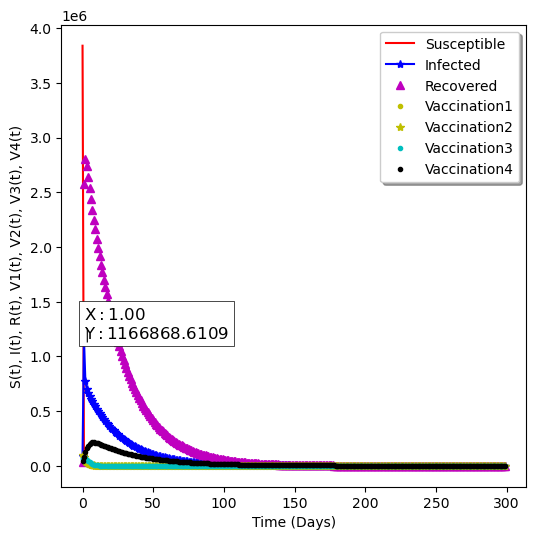

Infected Population Percent 0.2798


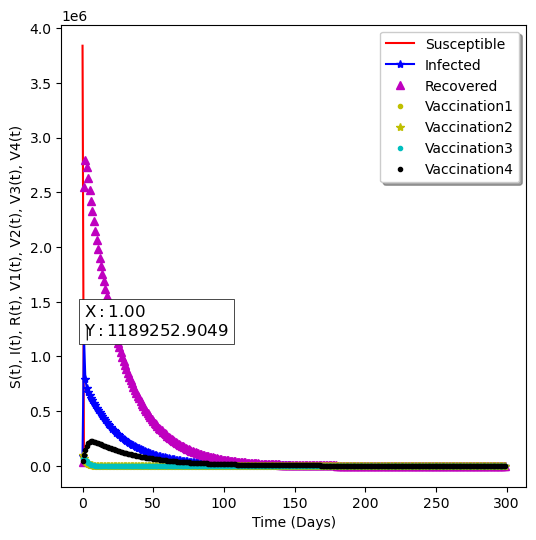

In [41]:
v=[{'rho1':0.94, 'rho2':0.85, 'rho3':0.75, 'rho4':0.65},{'rho1': 0.9,'rho2': 0.9,'rho3': 0.9, 'rho4':0.9}]
for i in range(len(v)):
    vaccine(bb[i],gg[i], v[i]['rho1'], v[i]['rho2'], v[i]['rho3'], v[i]['rho4'], out = out, nT = 300, name = "tn") 

In [42]:
def sirv_model(x ,t, Lambda, alpha,  beta, mu, gamma, delta,  rho1, rho2, rho3, rho4, eta1, eta2, eta3, eta4, epsilon1, epsilon2, epsilon3, epsilon4):
    S, I, R, V1, V2, V3, V4 =x[0], x[1], x[2], x[3], x[4], x[5], x[6]
    dSdt = Lambda - alpha * S * I + gamma * R - mu * S - eta1*rho1 * S + V1 * epsilon1 + V2 * epsilon2 + V3 * epsilon3 + V4 * epsilon4
    dIdt = alpha * S * I - (beta + delta + mu) * I
    dRdt = beta * I - (gamma + mu) * R
    dV1dt = eta1*rho1 * S - (epsilon1 + eta2*rho2 + mu) * V1
    dV2dt = eta2*rho2 * V1 - V2 * epsilon2 - eta3*rho3 * V2 - mu * V2
    dV3dt = eta3*rho3 * V2 - V3 * epsilon3 - eta4*rho4 * V3 - mu * V3
    dV4dt = eta4*rho4 * V3 - V4 * epsilon4 - mu * V4
    return [dSdt, dIdt, dRdt, dV1dt, dV2dt, dV3dt, dV4dt]

def vaccine(alpha,beta, rho1, rho2, rho3, rho4, out = "C:\\Users\\iboad/Results/", nT = 300, name = "tn", eta1=0.5, eta2=0.7, eta3=0.85, eta4=0.94, epsilon1= 0.01, epsilon2= 0.005,epsilon3= 0.0003, epsilon4=0.0001, mu= 0.03, gamma= 0.4, delta=0.0508, Lambda =0.0477):
#     
    # x0  =[0.873*N,0.065*N, 0.062*N]
    N = 4250000
    x0  =[N - 90000 - 30000 - 88348 - 96245 - 64559 - 41625 ,90000, 30000, 88348, 96245, 64559, 41625]
    tt =np.arange(0,nT)
    sirSol =odeint(sir_model, x0, tt, args=(Lambda, alpha, beta, mu, gamma, delta, rho1, rho2, rho3, rho4, eta1, eta2, eta3, eta4, epsilon1, epsilon2, epsilon3, epsilon4))
    sp, ip, rp, v1p, v2p, v3p, v4p =sirSol[:,0:1],sirSol[:,1:2], sirSol[:,2:3], sirSol[:,3:4], sirSol[:,4:5], sirSol[:,5:6], sirSol[:,6:7]
    np.save(out+'S_{}_{}_{}'.format(rho1, rho2, rho3, rho4, name), sp)
    np.save(out+'I_{}_{}_{}'.format(rho1, rho2, rho3, rho4, name), ip)
    np.save(out+'R_{}_{}_{}'.format(rho1, rho2, rho3, rho4, name), rp)
    np.save(out+'V1_{}_{}_{}'.format(rho1, rho2, rho3, rho4, name), v1p)
    np.save(out+'V2_{}_{}_{}'.format(rho1, rho2, rho3, rho4, name), v2p)
    np.save(out+'V3_{}_{}_{}'.format(rho1, rho2, rho3, rho4, name), v3p)
    np.save(out+'V4_{}_{}_{}'.format(rho1, rho2, rho3, rho4, name), v4p)
    xmax = tt[np.argmax(ip)]
    ymax = ip.max()
    per_y =ymax/N
    print('Percent %.4f'%(per_y))
    text= '\n'.join((
    r'$\mathrm{X}: %.2f$' % (xmax, ),   
    r'$\mathrm{Y}: %.4f$' % (ymax, )))
    from matplotlib.pylab import rcParams
    rcParams['figure.figsize'] =6,6
    # plt.plot(tt, sp, 'r', label='Susceptible')
    # plt.plot(tt, ip, '-*b', label='Infected')
    # plt.plot(tt, rp, '^m', label="Recovered")
    plt.plot(tt, v1p, '.y', label="Vaccination1")
    plt.plot(tt, v2p, '*y', label="Vaccination2")
    plt.plot(tt, v3p, '.c', label='Vaccination3')
    plt.plot(tt, v4p, '.k', label='Vaccination4')

#     plt.axvline(x=456)
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.50)
    plt.annotate(text, xy=(xmax, ymax), xytext=(xmax, ymax+0.04),bbox=bbox_props, fontsize=12)
    plt.annotate('|', xy=(xmax, ymax))
    plt.xlabel('Time (Days)')
    plt.ylabel('S(t), I(t), R(t), V1(t), V2(t), V3(t), V4(t)')
    plt.legend(['Vaccination1', 'Vaccination2', 'Vaccination3', 'Vaccination4' ], shadow=True, loc='best')
    plt.savefig(out+'vacc_{}_{}_{}.png'.format(name,rho1, rho2, rho3, rho4))
    plt.show()
    return 



Percent 0.2746


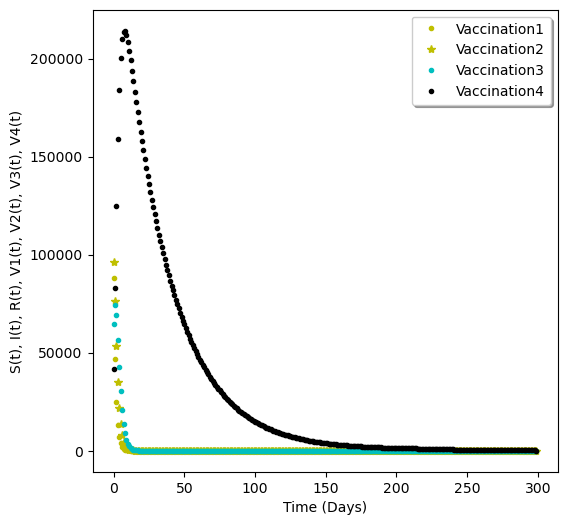

Percent 0.2798


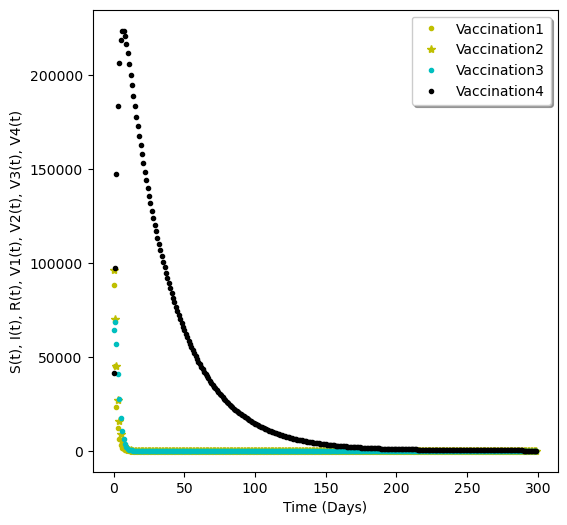

In [43]:
v=[{'rho1':0.94, 'rho2':0.85, 'rho3':0.75, 'rho4':0.65},{'rho1': 0.9,'rho2': 0.9,'rho3': 0.9, 'rho4':0.9}]
for i in range(len(v)):
    vaccine(bb[i],gg[i], v[i]['rho1'], v[i]['rho2'], v[i]['rho3'], v[i]['rho4'], out = out, nT = 300, name = "tn") 

## Plots for When $\eta_i=0.94\%$ at different vaccination rates and constant vaccination rate,$\rho_i=0.9\%$ 

In [44]:
def sirv_model(x ,t, Lambda, alpha,  beta, mu, gamma, delta,  rho1, rho2, rho3, rho4, eta1, eta2, eta3, eta4, epsilon1, epsilon2, epsilon3, epsilon4):
    S, I, R, V1, V2, V3, V4 =x[0], x[1], x[2], x[3], x[4], x[5], x[6]
    dSdt = Lambda - alpha * S * I + gamma * R - mu * S - eta1*rho1 * S + V1 * epsilon1 + V2 * epsilon2 + V3 * epsilon3 + V4 * epsilon4
    dIdt = alpha * S * I - (beta + delta + mu) * I
    dRdt = beta * I - (gamma + mu) * R
    dV1dt = eta1*rho1 * S - (epsilon1 + eta2*rho2 + mu) * V1
    dV2dt = eta2*rho2 * V1 - V2 * epsilon2 - eta3*rho3 * V2 - mu * V2
    dV3dt = eta3*rho3 * V2 - V3 * epsilon3 - eta4*rho4 * V3 - mu * V3
    dV4dt = eta4*rho4 * V3 - V4 * epsilon4 - mu * V4
    return [dSdt, dIdt, dRdt, dV1dt, dV2dt, dV3dt, dV4dt]

def vaccine(alpha,beta, rho1, rho2, rho3, rho4, out = "C:\\Users\\iboad/Results/", nT = 300, name = "tn", eta1=0.94, eta2=0.94, eta3=0.94, eta4=0.94, epsilon1= 0.01, epsilon2= 0.005,epsilon3= 0.0003, epsilon4=0.0001, mu= 0.03, gamma= 0.4, delta=0.0508, Lambda =0.0477):
#     
    # x0  =[0.873*N,0.065*N, 0.062*N]
    N = 4250000
    x0  =[N - 90000 - 30000 - 88348 - 96245 - 64559 - 41625 ,90000, 30000, 88348, 96245, 64559, 41625]
    tt =np.arange(0,nT)
    sirSol =odeint(sir_model, x0, tt, args=(Lambda, alpha, beta, mu, gamma, delta, rho1, rho2, rho3, rho4, eta1, eta2, eta3, eta4, epsilon1, epsilon2, epsilon3, epsilon4))
    sp, ip, rp, v1p, v2p, v3p, v4p =sirSol[:,0:1],sirSol[:,1:2], sirSol[:,2:3], sirSol[:,3:4], sirSol[:,4:5], sirSol[:,5:6], sirSol[:,6:7]
    np.save(out+'S_{}_{}_{}'.format(rho1, rho2, rho3, rho4, name), sp)
    np.save(out+'I_{}_{}_{}'.format(rho1, rho2, rho3, rho4, name), ip)
    np.save(out+'R_{}_{}_{}'.format(rho1, rho2, rho3, rho4, name), rp)
    np.save(out+'V1_{}_{}_{}'.format(rho1, rho2, rho3, rho4, name), v1p)
    np.save(out+'V2_{}_{}_{}'.format(rho1, rho2, rho3, rho4, name), v2p)
    np.save(out+'V3_{}_{}_{}'.format(rho1, rho2, rho3, rho4, name), v3p)
    np.save(out+'V4_{}_{}_{}'.format(rho1, rho2, rho3, rho4, name), v4p)
    xmax = tt[np.argmax(ip)]
    ymax = ip.max()
    per_y =ymax/N
    print('Percent %.4f'%(per_y))
    text= '\n'.join((
    r'$\mathrm{X}: %.2f$' % (xmax, ),   
    r'$\mathrm{Y}: %.4f$' % (ymax, )))
    from matplotlib.pylab import rcParams
    rcParams['figure.figsize'] =6,6
    plt.plot(tt, sp, 'r', label='Susceptible')
    plt.plot(tt, ip, '-*b', label='Infected')
    plt.plot(tt, rp, '^m', label="Recovered")
    plt.plot(tt, v1p, '.y', label="Vaccination1")
    plt.plot(tt, v2p, '*y', label="Vaccination2")
    plt.plot(tt, v3p, '.c', label='Vaccination3')
    plt.plot(tt, v4p, '.k', label='Vaccination4')

#     plt.axvline(x=456)
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.50)
    plt.annotate(text, xy=(xmax, ymax), xytext=(xmax, ymax+0.04),bbox=bbox_props, fontsize=12)
    plt.annotate('|', xy=(xmax, ymax))
    plt.xlabel('Time (Days)')
    plt.ylabel('S(t), I(t), R(t), V1(t), V2(t), V3(t), V4(t)')
    plt.legend(['Susceptible', 'Infected', 'Recovered', 'Vaccination1', 'Vaccination2', 'Vaccination3', 'Vaccination4' ], shadow=True, loc='best')
    plt.savefig(out+'vacc_{}_{}_{}.png'.format(name,rho1, rho2, rho3, rho4))
    plt.show()
    return 



Percent 0.2745


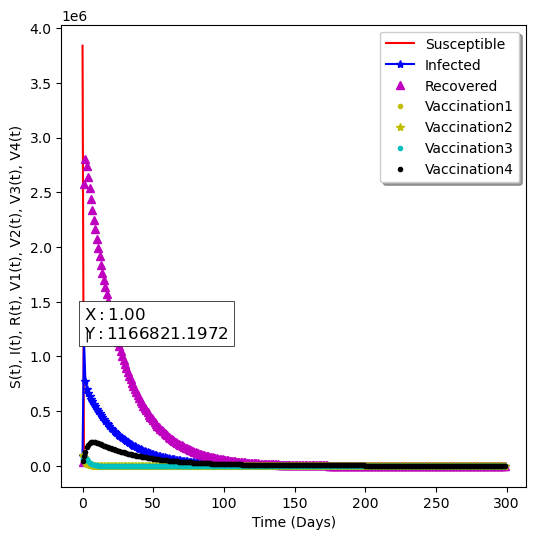

Percent 0.2798


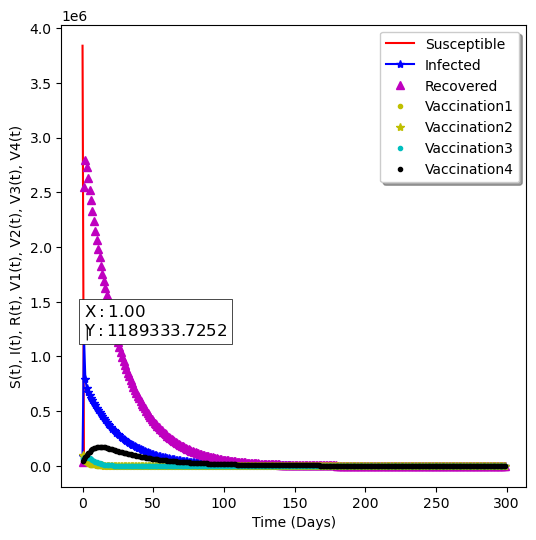

In [46]:
v=[{'rho1':0.94, 'rho2':0.85, 'rho3':0.75, 'rho4':0.65},{'rho1': 0.5,'rho2': 0.4,'rho3': 0.35, 'rho4':0.28}]
for i in range(len(v)):
    vaccine(bb[i],gg[i], v[i]['rho1'], v[i]['rho2'], v[i]['rho3'], v[i]['rho4'], out = out, nT = 300, name = "tn") 

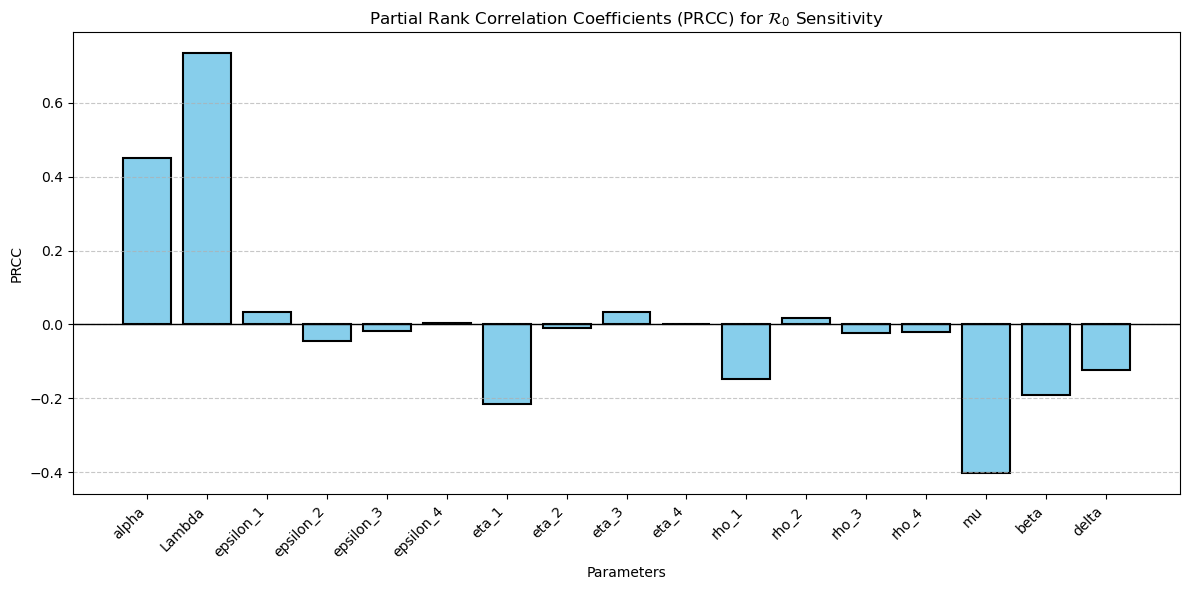

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from scipy.integrate import odeint
import pandas as pd

# Step 1: Define the parameters and their ranges
parameter_names = [
    'alpha', 'Lambda', 'epsilon_1', 'epsilon_2', 'epsilon_3', 'epsilon_4',
    'eta_1', 'eta_2', 'eta_3', 'eta_4', 'rho_1', 'rho_2', 'rho_3', 'rho_4', 
    'mu', 'beta', 'delta'
]

# Ranges for each parameter (can be adjusted as needed)
parameter_ranges = {
    'alpha': [0.08, 0.09],
    'Lambda': [0.025, 0.03],
    'epsilon_1': [0.009, 0.011],
    'epsilon_2': [0.004, 0.006],
    'epsilon_3': [0.0002, 0.0004],
    'epsilon_4': [0.00005, 0.00015],
    'eta_1': [0.28, 0.32],
    'eta_2': [0.38, 0.42],
    'eta_3': [0.46, 0.54],
    'eta_4': [0.75, 0.84],
    'rho_1': [0.028, 0.032],
    'rho_2': [0.018, 0.022],
    'rho_3': [0.014, 0.016],
    'rho_4': [0.0045, 0.0055],
    'mu': [0.014, 0.016],
    'beta': [0.065, 0.07],
    'delta': [0.029, 0.032]
}

# Step 2: Generate random samples for each parameter
num_samples = 1000  # Number of samples for each parameter

parameter_samples = {name: np.random.uniform(low, high, num_samples) for name, (low, high) in parameter_ranges.items()}

# Step 3: Define the formula for R0
def calculate_R0(params):
    alpha = params['alpha']
    Lambda = params['Lambda']
    epsilon = np.array([params[f'epsilon_{i}'] for i in range(1, 5)])
    eta = np.array([params[f'eta_{i}'] for i in range(1, 5)])
    rho = np.array([params[f'rho_{i}'] for i in range(1, 5)])
    mu = params['mu']
    beta = params['beta']
    delta = params['delta']
    
    V_star = np.zeros(4)
    V_star[0] = eta[0] * rho[0] * (Lambda + epsilon.sum()) / (mu + epsilon[0] + eta[1] * rho[1])
    V_star[1] = eta[1] * rho[1] * V_star[0] / (mu + epsilon[1] + eta[2] * rho[2])
    V_star[2] = eta[2] * rho[2] * V_star[1] / (mu + epsilon[2] + eta[3] * rho[3])
    V_star[3] = eta[3] * rho[3] * V_star[2] / (mu + epsilon[3])
    
    S_star = (Lambda + epsilon @ V_star) / (mu + eta[0] * rho[0])
    
    R0 = alpha * (Lambda + epsilon @ V_star) / ((mu + eta[0] * rho[0]) * (beta + delta + mu))
    
    return R0

# Step 4: Calculate R0 for each sample set
R0_values = []
for i in range(num_samples):
    params = {name: parameter_samples[name][i] for name in parameter_names}
    R0_values.append(calculate_R0(params))

R0_values = np.array(R0_values)

# Step 5: Compute PRCC values
prcc_values = {}
for param in parameter_names:
    prcc, _ = spearmanr(parameter_samples[param], R0_values)
    prcc_values[param] = prcc

# Step 6: Plot PRCC values
plt.figure(figsize=(12, 6))
bars = plt.bar(prcc_values.keys(), prcc_values.values(), color='skyblue', edgecolor='black', linewidth=1.5)
plt.axhline(0, color='black', linewidth=1)
plt.xlabel('Parameters')
plt.ylabel('PRCC')
plt.title('Partial Rank Correlation Coefficients (PRCC) for $\mathcal{R}_0$ Sensitivity')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
